# Capstone Project 2021 DATA 606
## Topic:  Network Intrusion Detection System with Machine Learning Approach
### Student: Edwin Valdez 

#### Final Project Presentation 

In [1]:
# Importing Libraries that we are going to use for the implementation of our project
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import string
import tensorflow as tf
from tensorflow import keras
import os
import tempfile
import matplotlib as mpl
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from sklearn import metrics
from keras.models import load_model
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

#### Dataset option
The dataset come from The University of New South Wales in Australian. 
The dataset consist of multiple part due too for a week of Network Traffic. 

The link where the dataset can be found is at: 
https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/

In [2]:
# Indexes to apply to our dataset since it just contains data
features = ["srcip","sport","dstip","dsport","proto","state","dur","sbytes","dbytes","sttl","dttl","sloss","dloss","service","Sload","Dload","Spkts","Dpkts","swin","dwin","stcpb","dtcpb","smeansz","dmeansz","trans_depth","res_bdy_len","Sjit","Djit","Stime","Ltime","Sintpkt","Dintpkt","tcprtt","synack","ackdat","is_sm_ips_ports","ct_state_ttl","ct_flw_http_mthd","is_ftp_login","ct_ftp_cmd","ct_srv_src","ct_srv_dst","ct_dst_ltm","ct_src_ ltm","ct_src_dport_ltm","ct_dst_sport_ltm","ct_dst_src_ltm","attack_cat","Label"]

In [3]:
# NB15_DATA in break down into 4 small datasets since the amount of data is large, here we are exporting each datasets 
NB15_data1 = pd.read_csv("UNSW-NB15CSV Files/UNSW-NB15_1.csv", header=None, names=features)
NB15_data2 = pd.read_csv("UNSW-NB15CSV Files/UNSW-NB15_2.csv", header=None, names=features)
NB15_data3 = pd.read_csv("UNSW-NB15CSV Files/UNSW-NB15_3.csv", header=None, names=features)
NB15_data4 = pd.read_csv("UNSW-NB15CSV Files/UNSW-NB15_4.csv", header=None, names=features)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,3,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,39,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# now we are going to combine all the dataset into one data for our transformation and handle of the information 
combined_datasets = pd.concat([NB15_data1,NB15_data2,NB15_data3,NB15_data4])
#combined_datasets = pd.concat([NB15_data1])

### Transformation and Cleaning of the dataset
In this part of the program, we are going to clean the dataset and transformation of the dataset. 
First, I clean the dataset by removing some columns that in my opinion would not be significant to describe the network traffic. In addition, we remove all null value in our dataset to increase the accuracy of the prediction. 
Second, for our transformation method, we change the some labels for "Attack Cat" columms that was missspell or had an extra space. 


In [5]:
# I will drop all these columns because so far I don't believe it would be significant for model.
combined_datasets.drop(columns= ['srcip','sport','dstip','dsport','ct_ftp_cmd','smeansz','dmeansz','Stime','Ltime'], inplace=True)

In [6]:
class_labels = ['Normal','Generic','Exploits','Fuzzers','DoS','Reconnaissance','Analysis','Backdoor','Shellcode' ,'Worms']

In [7]:
# This function would be significant when I want to remove all the null values and change it to normal
def get_rid_of_nulls(value):
    if pd.isnull(value):
        return 'Normal'
    else:
        return value
combined_datasets['attack_cat']=combined_datasets['attack_cat'].apply(get_rid_of_nulls)

In [8]:
# This function would be significant when I want to remove all the null values and change it to normal
def checkValue(value):
    if 'Backdoors' in value:
        #print(value)
        return 'Backdoor'
    else:
        return value
combined_datasets['attack_cat']=combined_datasets['attack_cat'].apply(checkValue)

In [9]:
data_to_use = combined_datasets
combined_datasets = combined_datasets.dropna()
print(data_to_use.shape)
print(combined_datasets.shape)

(2540047, 40)
(1087203, 40)


In [10]:
# Result when we change null to "normal"
combined_datasets.isnull().sum()

proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
Sload               0
Dload               0
Spkts               0
Dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
trans_depth         0
res_bdy_len         0
Sjit                0
Djit                0
Sintpkt             0
Dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_flw_http_mthd    0
is_ftp_login        0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ ltm         0
ct_src_dport_ltm    0
ct_dst_sport_ltm    0
ct_dst_src_ltm      0
attack_cat          0
Label               0
dtype: int64

##### Distribution of the Data
This is the distribution of labelsss under the columns "attack cat" which indicates the classification of the network traffic. 

In [11]:
combined_datasets['attack_cat'] = combined_datasets['attack_cat'].str.strip()
combined_datasets['attack_cat'].value_counts()

<ipython-input-11-912e6270e786>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_datasets['attack_cat'] = combined_datasets['attack_cat'].str.strip()


Normal            1064988
Generic              7522
Exploits             5409
Fuzzers              5051
Reconnaissance       1759
DoS                  1167
Backdoor              534
Analysis              526
Shellcode             223
Worms                  24
Name: attack_cat, dtype: int64

In [12]:
# This command show what kind of data we have so far including some format in each column
combined_datasets.info(verbose=True, null_counts=True)

<ipython-input-12-1639bef3d6e6>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  combined_datasets.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087203 entries, 0 to 387201
Data columns (total 40 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   proto             1087203 non-null  object 
 1   state             1087203 non-null  object 
 2   dur               1087203 non-null  float64
 3   sbytes            1087203 non-null  int64  
 4   dbytes            1087203 non-null  int64  
 5   sttl              1087203 non-null  int64  
 6   dttl              1087203 non-null  int64  
 7   sloss             1087203 non-null  int64  
 8   dloss             1087203 non-null  int64  
 9   service           1087203 non-null  object 
 10  Sload             1087203 non-null  float64
 11  Dload             1087203 non-null  float64
 12  Spkts             1087203 non-null  int64  
 13  Dpkts             1087203 non-null  int64  
 14  swin              1087203 non-null  int64  
 15  dwin              1087203 non-null  int64  
 16  s

##### Here are some of the helper functions that would help us to transform the data to increase the accuracy of our data. 

In [13]:
# Function used to create a new df with the enconded df
def helperCreationCate(dfEnconded, colunmNames):
    hotEncoder = OneHotEncoder(categories='auto')
    newDfEnconded =  hotEncoder.fit_transform(dfEnconded)
    dataframe = pd.DataFrame(newDfEnconded.toarray(),columns=colunmNames)
    return dataframe

In [14]:
# Function used to created new column names for the new categories
def createLabel(stringLine, check):
    #creating the new variable name for the column Name
    newCategory= stringLine
    newCat = newCategory +'-'
    dfSorted = sorted(check[stringLine].unique())
    #creating a unique category name for the column Name
    categoryName=[newCat + x for x in dfSorted]
    return categoryName

In [15]:
#creating the new column names for the new categories on the Train dataset
protocolNames = createLabel('proto',combined_datasets)
FlagNames = createLabel('state',combined_datasets)
ServiceNames = createLabel('service',combined_datasets)
combinationColumn = ServiceNames + FlagNames + protocolNames


In [16]:
# I will hot econder those columns that would be significant to the model by I need a number representation of its string
#columns = ['proto','state', 'service', 'attack_cat' ]
columns = ['proto','state', 'service' ]
newDF=combined_datasets[columns]

In [17]:
entoder_df= newDF.apply(LabelEncoder().fit_transform)

In [18]:
#creating the new df with the new categories added to the train dataset
categorical_df = helperCreationCate(entoder_df, combinationColumn)

In [19]:
#Function to join the categorical and general df for train and test dataset.
#It will also replace the final label column with a numerical value
def optimizeDF(dfCheckOriginal, dfCheckCategorical):
    #joining the two datasets and droping the old object columns
    dfCheckOriginal = dfCheckOriginal.reset_index(drop=True)
    FinalDF=dfCheckOriginal.join(dfCheckCategorical)
    FinalDF.drop('proto', axis=1, inplace=True)
    FinalDF.drop('state', axis=1, inplace=True)
    FinalDF.drop('service', axis=1, inplace=True)
#     FinalDF.drop('attack_cat', axis=1, inplace=True)
    print(FinalDF.shape)
    return FinalDF

In [20]:
DFFinal = optimizeDF(combined_datasets, categorical_df)

(1087203, 201)


In [21]:
# def remove_columns(history, label, n):
DFFinal.shape    

(1087203, 201)

Text(0.5, 1.0, 'Correlation Matrix')

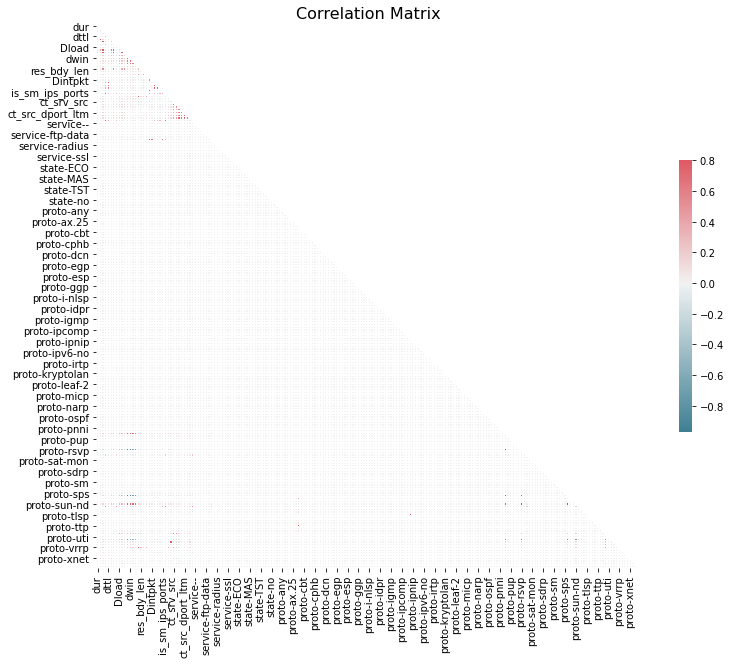

In [22]:
#putting in a different variable the correlation matrix
# checking the correlation value for each variable 
# helps to determine if we have a good data for our neural network model
corr = DFFinal.corr()
#plotting the correlation matrix
dfMask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(14,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#using sns heatmap for the plotting
sns.heatmap(corr,mask=dfMask, cmap=cmap, vmax=.8, center=0,square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.title('Correlation Matrix', fontsize = 16)

In [23]:
# I will drop all these columns because so far I don't believe it would be significant for model.
DFFinal.drop(columns= ['attack_cat'], inplace=True)

In [24]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(DFFinal, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

The class ratio for the original data: 48.2:1 (681675/14134)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


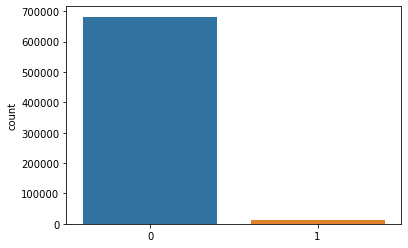

In [25]:
y2 = train_df['Label'].values
# Calculate Y2 ratio
def data_ratio(y2):
    '''
    Calculate Y2's ratio
    '''
    unique, count = np.unique(y2, return_counts=True)
    ratio = round(count[0]/count[1], 1)
    return f'{ratio}:1 ({count[0]}/{count[1]})'
print('The class ratio for the original data:', data_ratio(y2))
sns.countplot(y2,label="Sum")
plt.show()

In [26]:
# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Label'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Label'))
test_labels = np.array(test_df.pop('Label'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [27]:
(unique, counts) = np.unique(bool_train_labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[     0 681675]
 [     1  14134]]


In [28]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (695809,)
Validation labels shape: (173953,)
Test labels shape: (217441,)
Training features shape: (695809, 199)
Validation features shape: (173953, 199)
Test features shape: (217441, 199)


### Define the model and metrics
This step would create a function that would create a simple neural network with a densly connection to hidde layer and a dropout option that would help to reduce overfitting. At the same time, an output sigmoid layer that returns the probability of a network traffic being malicious. 
#### The metrics that I am going to use are 
**Accuracy**: it is the percentage of examples correctly classified

**Precision**: it is the percentage of predicted positives that were correctly classified

**Recall**: it is the percentage of actual positives that were correctly classified

**AUC**: it refers to the Area Under the Curve of a Receiver Operating Characteristic curve (ROC-AUC). This metric is equal to the probability that a classifier will rank a random positive sample higher than a random negative sample.

**AUPRC**: it refers to Area Under the Curve of the Precision-Recall Curve. This metric computes precision-recall pairs for different probability thresholds.

In [29]:
# creatign a new keras metric with my model for the rest of the project
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
        keras.layers.Dense(200, activation='relu',input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid',
        bias_initializer=output_bias),
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(lr=1e-3),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics)

    return model

In [30]:
EPOCHS = 100
BATCH_SIZE = 75000

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [31]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               40000     
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 40,201
Trainable params: 40,201
Non-trainable params: 0
_________________________________________________________________


Some quick test to predict our model to see if it work

In [32]:
model.predict(train_features[:10])

array([[0.7998324 ],
       [0.8259502 ],
       [0.79127586],
       [0.733373  ],
       [0.82252145],
       [0.81911635],
       [0.8203453 ],
       [0.835658  ],
       [0.8281773 ],
       [0.8369171 ]], dtype=float32)

In [33]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

In [34]:
neg, pos = np.bincount(DFFinal['Label'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(total, pos, 100 * pos / total))

Examples:
    Total: 1087203
    Positive: 22215 (2.04% of total)



In [35]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 1.6441


In [36]:
initial_bias = np.log([pos/neg])
initial_bias

array([-3.86995107])

#### Creating the initial weights and setting bias configuration
Creatign a temp file that would hold the data for the initial model's weights.

Then, creates a basic initial model that would help to set that initial value for the bias option. The bias configuration would help to train the unbalance data. 

In [37]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [38]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:20])

array([[0.0185869 ],
       [0.02454033],
       [0.01563123],
       [0.01591882],
       [0.02293006],
       [0.02137521],
       [0.01759139],
       [0.02413827],
       [0.02098143],
       [0.01765978],
       [0.02234578],
       [0.01860139],
       [0.02605066],
       [0.01772615],
       [0.0226067 ],
       [0.0128634 ],
       [0.01949742],
       [0.02324927],
       [0.01928014],
       [0.01895985]], dtype=float32)

In [39]:
# train_labelsDF.values
print(train_features.shape)
print(train_labels.shape)
print(val_features.shape)
print(val_labels.shape)

(695809, 199)
(695809,)
(173953, 199)
(173953,)


In [40]:
# initial model to help to get the bias values. 
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [41]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [42]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [43]:
def plot_loss(history, label, n):
    # Use a log scale on y-axis to show the wide range of values.
    plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
    plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

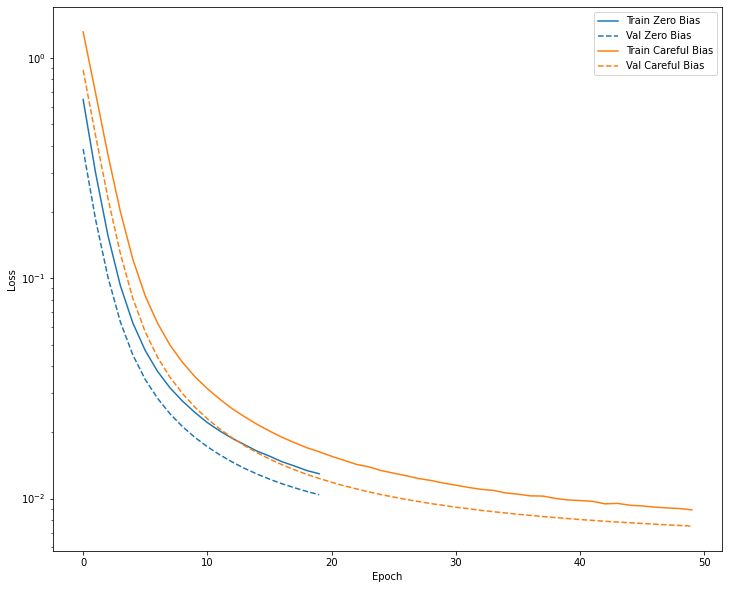

In [44]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [45]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    #callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
10/10 [==============================] - 5s 504ms/step - loss: 1.3127 - tp: 17311.0000 - fp: 655800.0000 - tn: 196285.0000 - fn: 366.0000 - accuracy: 0.2456 - precision: 0.0257 - recall: 0.9793 - auc: 0.8230 - prc: 0.3076 - val_loss: 0.8804 - val_tp: 3543.0000 - val_fp: 132998.0000 - val_tn: 37412.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.2354 - val_precision: 0.0259 - val_recall: 1.0000 - val_auc: 0.9940 - val_prc: 0.6466
Epoch 2/100
10/10 [==============================] - 3s 323ms/step - loss: 0.6937 - tp: 14060.0000 - fp: 331580.0000 - tn: 350095.0000 - fn: 74.0000 - accuracy: 0.5234 - precision: 0.0407 - recall: 0.9948 - auc: 0.9821 - prc: 0.6140 - val_loss: 0.4447 - val_tp: 3543.0000 - val_fp: 12565.0000 - val_tn: 157845.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9278 - val_precision: 0.2200 - val_recall: 1.0000 - val_auc: 0.9965 - val_prc: 0.7242
Epoch 3/100
10/10 [==============================] - 3s 284ms/step - loss: 0.3625 - tp: 14048.0000 - fp: 45353.0000 - t

Epoch 20/100
10/10 [==============================] - 3s 261ms/step - loss: 0.0162 - tp: 13430.0000 - fp: 2159.0000 - tn: 679516.0000 - fn: 704.0000 - accuracy: 0.9959 - precision: 0.8615 - recall: 0.9502 - auc: 0.9992 - prc: 0.9546 - val_loss: 0.0123 - val_tp: 3499.0000 - val_fp: 534.0000 - val_tn: 169876.0000 - val_fn: 44.0000 - val_accuracy: 0.9967 - val_precision: 0.8676 - val_recall: 0.9876 - val_auc: 0.9994 - val_prc: 0.9690
Epoch 21/100
10/10 [==============================] - 3s 264ms/step - loss: 0.0155 - tp: 13501.0000 - fp: 2147.0000 - tn: 679528.0000 - fn: 633.0000 - accuracy: 0.9960 - precision: 0.8628 - recall: 0.9552 - auc: 0.9992 - prc: 0.9558 - val_loss: 0.0119 - val_tp: 3501.0000 - val_fp: 536.0000 - val_tn: 169874.0000 - val_fn: 42.0000 - val_accuracy: 0.9967 - val_precision: 0.8672 - val_recall: 0.9881 - val_auc: 0.9994 - val_prc: 0.9701
Epoch 22/100
10/10 [==============================] - 3s 260ms/step - loss: 0.0149 - tp: 13445.0000 - fp: 2107.0000 - tn: 679568.0

Epoch 39/100
10/10 [==============================] - 3s 268ms/step - loss: 0.0100 - tp: 13463.0000 - fp: 1822.0000 - tn: 679853.0000 - fn: 671.0000 - accuracy: 0.9964 - precision: 0.8808 - recall: 0.9525 - auc: 0.9994 - prc: 0.9718 - val_loss: 0.0082 - val_tp: 3479.0000 - val_fp: 486.0000 - val_tn: 169924.0000 - val_fn: 64.0000 - val_accuracy: 0.9968 - val_precision: 0.8774 - val_recall: 0.9819 - val_auc: 0.9996 - val_prc: 0.9788
Epoch 40/100
10/10 [==============================] - 3s 260ms/step - loss: 0.0100 - tp: 13570.0000 - fp: 1944.0000 - tn: 679731.0000 - fn: 564.0000 - accuracy: 0.9964 - precision: 0.8747 - recall: 0.9601 - auc: 0.9994 - prc: 0.9710 - val_loss: 0.0081 - val_tp: 3482.0000 - val_fp: 489.0000 - val_tn: 169921.0000 - val_fn: 61.0000 - val_accuracy: 0.9968 - val_precision: 0.8769 - val_recall: 0.9828 - val_auc: 0.9996 - val_prc: 0.9791
Epoch 41/100
10/10 [==============================] - 3s 263ms/step - loss: 0.0098 - tp: 13534.0000 - fp: 1956.0000 - tn: 679719.0

Epoch 58/100
10/10 [==============================] - 3s 255ms/step - loss: 0.0084 - tp: 13584.0000 - fp: 1862.0000 - tn: 679813.0000 - fn: 550.0000 - accuracy: 0.9965 - precision: 0.8795 - recall: 0.9611 - auc: 0.9995 - prc: 0.9763 - val_loss: 0.0072 - val_tp: 3464.0000 - val_fp: 475.0000 - val_tn: 169935.0000 - val_fn: 79.0000 - val_accuracy: 0.9968 - val_precision: 0.8794 - val_recall: 0.9777 - val_auc: 0.9996 - val_prc: 0.9817
Epoch 59/100
10/10 [==============================] - 3s 256ms/step - loss: 0.0083 - tp: 13545.0000 - fp: 1827.0000 - tn: 679848.0000 - fn: 589.0000 - accuracy: 0.9965 - precision: 0.8811 - recall: 0.9583 - auc: 0.9995 - prc: 0.9764 - val_loss: 0.0072 - val_tp: 3464.0000 - val_fp: 473.0000 - val_tn: 169937.0000 - val_fn: 79.0000 - val_accuracy: 0.9968 - val_precision: 0.8799 - val_recall: 0.9777 - val_auc: 0.9996 - val_prc: 0.9817
Epoch 60/100
10/10 [==============================] - 3s 254ms/step - loss: 0.0083 - tp: 13497.0000 - fp: 1789.0000 - tn: 679886.0

Epoch 77/100
10/10 [==============================] - 3s 250ms/step - loss: 0.0077 - tp: 13556.0000 - fp: 1764.0000 - tn: 679911.0000 - fn: 578.0000 - accuracy: 0.9966 - precision: 0.8849 - recall: 0.9591 - auc: 0.9996 - prc: 0.9786 - val_loss: 0.0067 - val_tp: 3446.0000 - val_fp: 454.0000 - val_tn: 169956.0000 - val_fn: 97.0000 - val_accuracy: 0.9968 - val_precision: 0.8836 - val_recall: 0.9726 - val_auc: 0.9997 - val_prc: 0.9830
Epoch 78/100
10/10 [==============================] - 2s 249ms/step - loss: 0.0076 - tp: 13616.0000 - fp: 1791.0000 - tn: 679884.0000 - fn: 518.0000 - accuracy: 0.9967 - precision: 0.8838 - recall: 0.9634 - auc: 0.9996 - prc: 0.9792 - val_loss: 0.0067 - val_tp: 3461.0000 - val_fp: 465.0000 - val_tn: 169945.0000 - val_fn: 82.0000 - val_accuracy: 0.9969 - val_precision: 0.8816 - val_recall: 0.9769 - val_auc: 0.9997 - val_prc: 0.9831
Epoch 79/100
10/10 [==============================] - 3s 256ms/step - loss: 0.0076 - tp: 13594.0000 - fp: 1761.0000 - tn: 679914.0

Epoch 96/100
10/10 [==============================] - 3s 257ms/step - loss: 0.0072 - tp: 13568.0000 - fp: 1748.0000 - tn: 679927.0000 - fn: 566.0000 - accuracy: 0.9967 - precision: 0.8859 - recall: 0.9600 - auc: 0.9996 - prc: 0.9800 - val_loss: 0.0065 - val_tp: 3441.0000 - val_fp: 448.0000 - val_tn: 169962.0000 - val_fn: 102.0000 - val_accuracy: 0.9968 - val_precision: 0.8848 - val_recall: 0.9712 - val_auc: 0.9997 - val_prc: 0.9838
Epoch 97/100
10/10 [==============================] - 3s 256ms/step - loss: 0.0072 - tp: 13651.0000 - fp: 1793.0000 - tn: 679882.0000 - fn: 483.0000 - accuracy: 0.9967 - precision: 0.8839 - recall: 0.9658 - auc: 0.9996 - prc: 0.9804 - val_loss: 0.0065 - val_tp: 3455.0000 - val_fp: 454.0000 - val_tn: 169956.0000 - val_fn: 88.0000 - val_accuracy: 0.9969 - val_precision: 0.8839 - val_recall: 0.9752 - val_auc: 0.9997 - val_prc: 0.9838
Epoch 98/100
10/10 [==============================] - 3s 253ms/step - loss: 0.0071 - tp: 13515.0000 - fp: 1651.0000 - tn: 680024.

#### Showing the results of the training history
We are creating a plots to shows the accuracy and loss of the taining set that we have so far. Then, we will compare it to the validation set base on the history of training through the baseline and bias values. 

In [46]:
def plot_metrics(history, title):
    
    metrics = ['loss', 'prc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        title2 = title + '- ' + metrics[n]
        # displaying the title
        plt.title(label=title2, loc="left", fontstyle='italic')
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([-1,2])
        else:
            plt.ylim([-1,2])
            plt.legend()
    

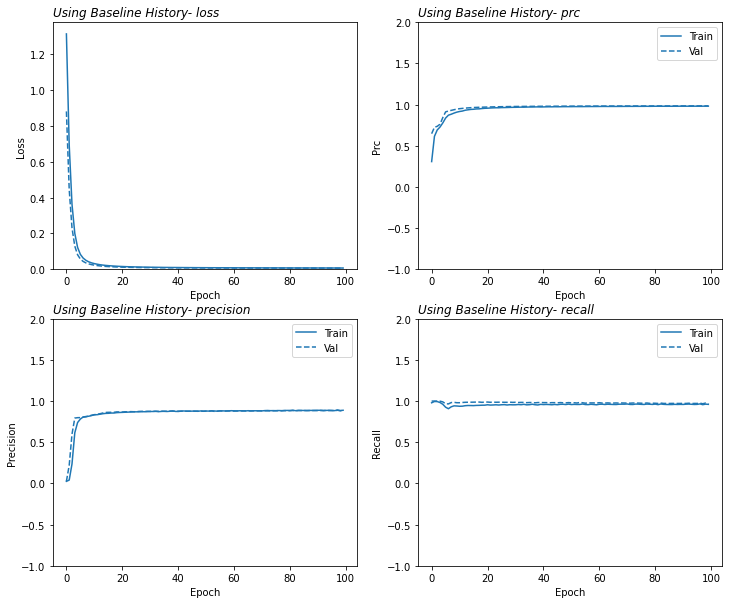

In [47]:
plot_metrics(baseline_history, "Using Baseline History")

In [48]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

#### Showing the results of the model with the confusion matrix
The confusion matrix summarize the actual vs predicted labels where the X axis is the predicted label and the Y axis is hte actual label. 

In [49]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.006425794679671526
tp :  4383.0
fp :  506.0
tn :  212397.0
fn :  155.0
accuracy :  0.9969601035118103
precision :  0.8965023756027222
recall :  0.9658439755439758
auc :  0.9996753931045532
prc :  0.984456479549408

Legitimate Transactions Detected (True Negatives):  212397
Legitimate Transactions Incorrectly Detected (False Positives):  506
Fraudulent Transactions Missed (False Negatives):  155
Fraudulent Transactions Detected (True Positives):  4383
Total Fraudulent Transactions:  4538


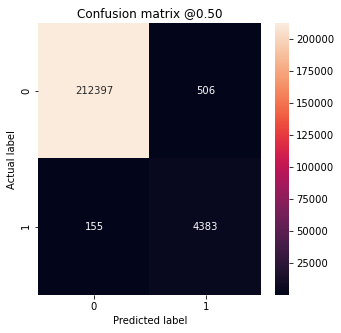

In [50]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

**Analysis**

In this case, the matrix shows that I have relatively few false positives, meaning that there was relatively little legitimate network traffic that was incorrectly flagged. However, the trade-off may be preferable because false negatives would allow malicious network traffic to go through, whereas false positives may cause legitimate traffic to be blocked from the company network. 
 

In [51]:
def plot_roc(title, name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)
    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,20])
    plt.ylim([80,100.5])
    plt.grid(True)
    plt.title(label=title, loc="center", fontstyle='italic')
    ax = plt.gca()
    ax.set_aspect('equal')

#### Showing a ROC graph 
I will plot the Receiver Operating Characteristic (ROC) because it would shows, at a glance, the range of performance the model can reach just by tuning the output threshold.

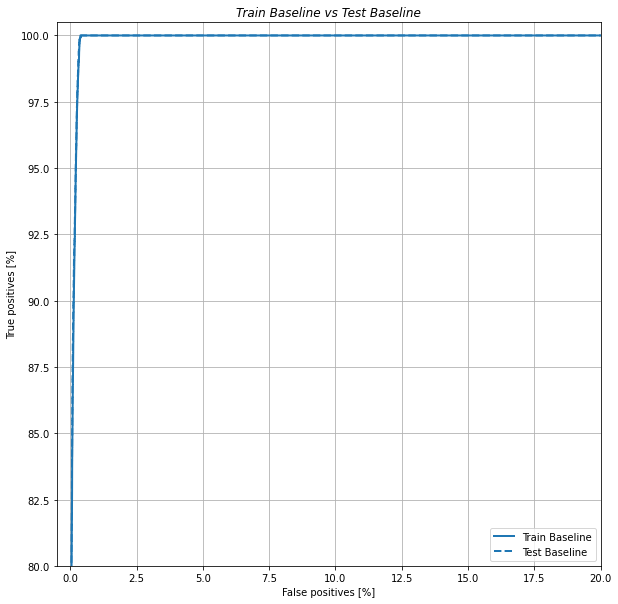

In [52]:
plot_roc("Train Baseline vs Test Baseline","Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Train Baseline vs Test Baseline","Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

#### Calculating Class Weights for model adjustments
For this section of the project, the goal is to identify network malicious activityuu, but I do not have very many of those positive samples to work with. Therefore, the objective is to have the classifier heavily weight the few exmaples that are available. This is possible by passing Keras weights for each class through a parameter. Then, it will cause the model to increase the importance of those examples from an under-represented class. 

In [53]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.51
Weight for class 1: 24.47


In [54]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/100
10/10 [==============================] - 5s 499ms/step - loss: 0.7675 - tp: 18335.0000 - fp: 665951.0000 - tn: 228627.0000 - fn: 337.0000 - accuracy: 0.2704 - precision: 0.0268 - recall: 0.9820 - auc: 0.8763 - prc: 0.4558 - val_loss: 0.9451 - val_tp: 3543.0000 - val_fp: 163557.0000 - val_tn: 6853.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.0598 - val_precision: 0.0212 - val_recall: 1.0000 - val_auc: 0.9959 - val_prc: 0.7136
Epoch 2/100
10/10 [==============================] - 3s 326ms/step - loss: 0.4113 - tp: 14122.0000 - fp: 376874.0000 - tn: 304801.0000 - fn: 12.0000 - accuracy: 0.4583 - precision: 0.0361 - recall: 0.9992 - auc: 0.9935 - prc: 0.7039 - val_loss: 0.4935 - val_tp: 3543.0000 - val_fp: 17335.0000 - val_tn: 153075.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9003 - val_precision: 0.1697 - val_recall: 1.0000 - val_auc: 0.9966 - val_prc: 0.7396
Epoch 3/100
10/10 [==============================] - 3s 288ms/step - loss: 0.2230 - tp: 14130.0000 - fp: 58378.0000 - tn

Epoch 20/100
10/10 [==============================] - 3s 251ms/step - loss: 0.0194 - tp: 14133.0000 - fp: 3509.0000 - tn: 678166.0000 - fn: 1.0000 - accuracy: 0.9950 - precision: 0.8011 - recall: 0.9999 - auc: 0.9985 - prc: 0.8787 - val_loss: 0.0265 - val_tp: 3543.0000 - val_fp: 802.0000 - val_tn: 169608.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9954 - val_precision: 0.8154 - val_recall: 1.0000 - val_auc: 0.9986 - val_prc: 0.8838
Epoch 21/100
10/10 [==============================] - 3s 252ms/step - loss: 0.0188 - tp: 14130.0000 - fp: 3426.0000 - tn: 678249.0000 - fn: 4.0000 - accuracy: 0.9951 - precision: 0.8049 - recall: 0.9997 - auc: 0.9986 - prc: 0.8843 - val_loss: 0.0257 - val_tp: 3543.0000 - val_fp: 788.0000 - val_tn: 169622.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9955 - val_precision: 0.8181 - val_recall: 1.0000 - val_auc: 0.9986 - val_prc: 0.8853
Epoch 22/100
10/10 [==============================] - 3s 250ms/step - loss: 0.0183 - tp: 14131.0000 - fp: 3396.0000 - tn: 678279

Epoch 39/100
10/10 [==============================] - 3s 252ms/step - loss: 0.0137 - tp: 14132.0000 - fp: 2956.0000 - tn: 678719.0000 - fn: 2.0000 - accuracy: 0.9957 - precision: 0.8270 - recall: 0.9999 - auc: 0.9989 - prc: 0.9087 - val_loss: 0.0198 - val_tp: 3543.0000 - val_fp: 712.0000 - val_tn: 169698.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9959 - val_precision: 0.8327 - val_recall: 1.0000 - val_auc: 0.9990 - val_prc: 0.9169
Epoch 40/100
10/10 [==============================] - 3s 251ms/step - loss: 0.0135 - tp: 14133.0000 - fp: 2939.0000 - tn: 678736.0000 - fn: 1.0000 - accuracy: 0.9958 - precision: 0.8278 - recall: 0.9999 - auc: 0.9989 - prc: 0.9098 - val_loss: 0.0194 - val_tp: 3543.0000 - val_fp: 706.0000 - val_tn: 169704.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9959 - val_precision: 0.8338 - val_recall: 1.0000 - val_auc: 0.9991 - val_prc: 0.9240
Epoch 41/100
10/10 [==============================] - 3s 255ms/step - loss: 0.0134 - tp: 14132.0000 - fp: 2899.0000 - tn: 678776

Epoch 58/100
10/10 [==============================] - 3s 253ms/step - loss: 0.0119 - tp: 14133.0000 - fp: 2702.0000 - tn: 678973.0000 - fn: 1.0000 - accuracy: 0.9961 - precision: 0.8395 - recall: 0.9999 - auc: 0.9991 - prc: 0.9255 - val_loss: 0.0175 - val_tp: 3543.0000 - val_fp: 652.0000 - val_tn: 169758.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9963 - val_precision: 0.8446 - val_recall: 1.0000 - val_auc: 0.9992 - val_prc: 0.9367
Epoch 59/100
10/10 [==============================] - 3s 253ms/step - loss: 0.0119 - tp: 14133.0000 - fp: 2686.0000 - tn: 678989.0000 - fn: 1.0000 - accuracy: 0.9961 - precision: 0.8403 - recall: 0.9999 - auc: 0.9991 - prc: 0.9236 - val_loss: 0.0176 - val_tp: 3543.0000 - val_fp: 651.0000 - val_tn: 169759.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9963 - val_precision: 0.8448 - val_recall: 1.0000 - val_auc: 0.9992 - val_prc: 0.9363
Epoch 60/100
10/10 [==============================] - 3s 252ms/step - loss: 0.0118 - tp: 14134.0000 - fp: 2683.0000 - tn: 678992

Epoch 77/100
10/10 [==============================] - 3s 260ms/step - loss: 0.0110 - tp: 14134.0000 - fp: 2582.0000 - tn: 679093.0000 - fn: 0.0000e+00 - accuracy: 0.9963 - precision: 0.8455 - recall: 1.0000 - auc: 0.9992 - prc: 0.9366 - val_loss: 0.0165 - val_tp: 3543.0000 - val_fp: 634.0000 - val_tn: 169776.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9964 - val_precision: 0.8482 - val_recall: 1.0000 - val_auc: 0.9994 - val_prc: 0.9507
Epoch 78/100
10/10 [==============================] - 3s 260ms/step - loss: 0.0110 - tp: 14134.0000 - fp: 2592.0000 - tn: 679083.0000 - fn: 0.0000e+00 - accuracy: 0.9963 - precision: 0.8450 - recall: 1.0000 - auc: 0.9992 - prc: 0.9355 - val_loss: 0.0166 - val_tp: 3543.0000 - val_fp: 633.0000 - val_tn: 169777.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9964 - val_precision: 0.8484 - val_recall: 1.0000 - val_auc: 0.9994 - val_prc: 0.9501
Epoch 79/100
10/10 [==============================] - 3s 257ms/step - loss: 0.0109 - tp: 14134.0000 - fp: 2572.0000 - tn

Epoch 96/100
10/10 [==============================] - 3s 255ms/step - loss: 0.0105 - tp: 14134.0000 - fp: 2521.0000 - tn: 679154.0000 - fn: 0.0000e+00 - accuracy: 0.9964 - precision: 0.8486 - recall: 1.0000 - auc: 0.9993 - prc: 0.9467 - val_loss: 0.0159 - val_tp: 3543.0000 - val_fp: 612.0000 - val_tn: 169798.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9965 - val_precision: 0.8527 - val_recall: 1.0000 - val_auc: 0.9995 - val_prc: 0.9602
Epoch 97/100
10/10 [==============================] - 3s 250ms/step - loss: 0.0105 - tp: 14134.0000 - fp: 2516.0000 - tn: 679159.0000 - fn: 0.0000e+00 - accuracy: 0.9964 - precision: 0.8489 - recall: 1.0000 - auc: 0.9993 - prc: 0.9424 - val_loss: 0.0160 - val_tp: 3543.0000 - val_fp: 612.0000 - val_tn: 169798.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9965 - val_precision: 0.8527 - val_recall: 1.0000 - val_auc: 0.9995 - val_prc: 0.9591
Epoch 98/100
10/10 [==============================] - 2s 247ms/step - loss: 0.0105 - tp: 14133.0000 - fp: 2492.0000 - tn

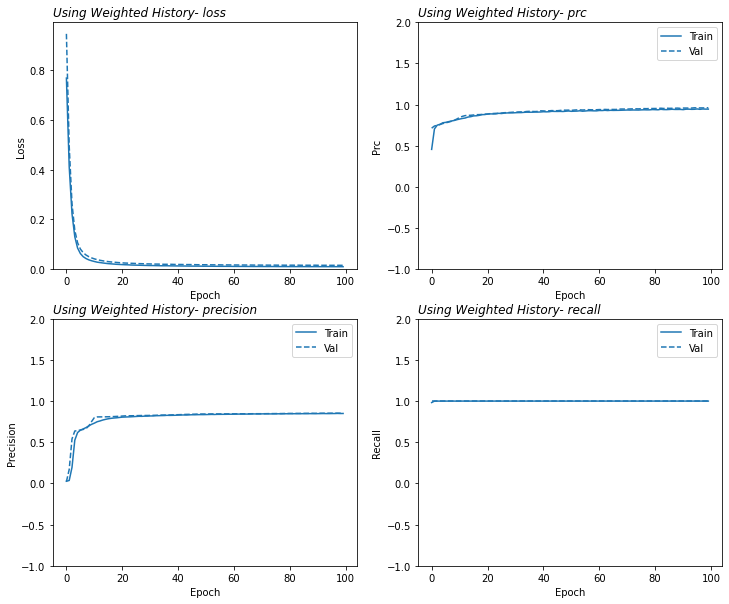

In [55]:
plot_metrics(weighted_history, "Using Weighted History")

In [56]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.015418615192174911
tp :  4537.0
fp :  740.0
tn :  212163.0
fn :  1.0
accuracy :  0.9965921640396118
precision :  0.859768807888031
recall :  0.9997796416282654
auc :  0.9994922876358032
prc :  0.9634353518486023

Legitimate Transactions Detected (True Negatives):  212163
Legitimate Transactions Incorrectly Detected (False Positives):  740
Fraudulent Transactions Missed (False Negatives):  1
Fraudulent Transactions Detected (True Positives):  4537
Total Fraudulent Transactions:  4538


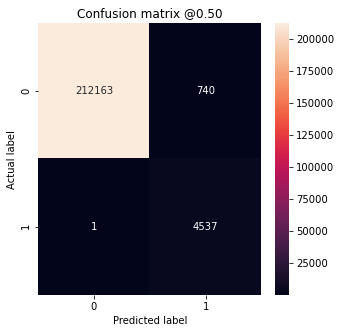

In [57]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

**Second Analysis**

We can see the results after applying some weight configuration to our model. Accoring to the result, we were be able to reduce the amount of network traffic that was clasify as adnormal and get better result where we classify adnormal traffic to be normal. Our recall is hight but so far we are getting better accuracy results when we classify our network traffic. 

### Creating a ROC graph

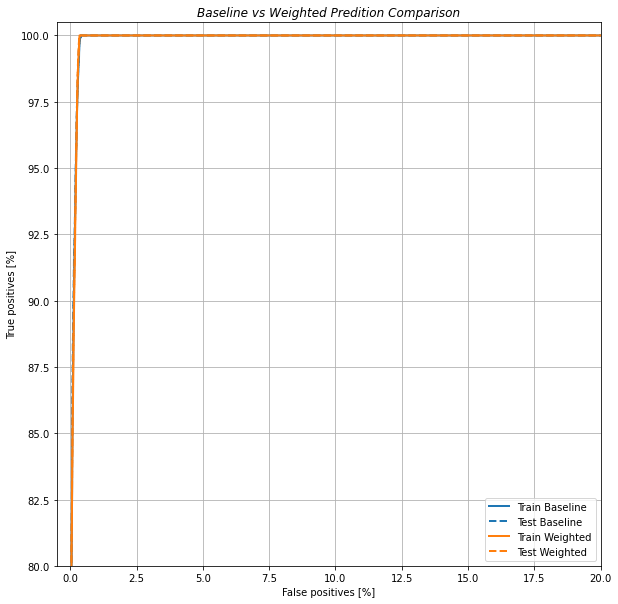

In [58]:
plot_roc("Baseline vs Weighted Predition Comparison", "Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Baseline vs Weighted Predition Comparison","Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Baseline vs Weighted Predition Comparison","Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Baseline vs Weighted Predition Comparison","Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

### Taking Care of the oversampling 
In this phase, I would resample the dataset by oversampling the minority class to increase the performance of my dataset. 

In [59]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [60]:
# This method would balance the dataset manually by choosing the right number of randow indices from the 
# positive examples
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(681675, 199)

In [61]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(1363350, 199)

In [62]:
BUFFER_SIZE = 500000
# using tf.data is the easiest way to produce balancd examples is to start with a 
# positive and a negative dataset, and merge them to create a more balace dataset. 
def make_ds(features, labels):
    ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
    ds = ds.shuffle(BUFFER_SIZE).repeat()
    return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [63]:
for features, label in pos_ds.take(1):
    print("Features:\n", features.numpy())
    print()
    print("Label: ", label.numpy())

Features:
 [-4.76248159e-02 -1.47387791e-01 -2.61207616e-01  5.00000000e+00
 -1.25593654e+00 -4.32623284e-01 -3.34442596e-01  1.09327294e+00
 -6.75744417e-01 -5.25819427e-01 -4.06846074e-01 -1.56641112e+00
 -1.56334686e+00 -1.06712979e+00 -1.06548223e+00 -3.12536911e-01
 -1.01205099e-01 -1.24097033e-01 -2.18755234e-01 -8.24273196e-02
 -6.22239666e-02 -1.09358044e-01 -1.13693508e-01 -9.11791667e-02
 -5.06289420e-02  5.00000000e+00 -2.09905479e-01 -1.39129379e-01
  8.26493897e-01  9.61624534e-01 -2.92011007e-01 -3.97764553e-01
  8.26767377e-01  1.48324797e+00  4.68346093e-01 -3.17180284e-03
 -3.97607671e-03 -4.15287967e-03 -6.11293485e-03 -3.79103767e-03
 -3.17180284e-03 -7.75726788e-02 -3.79103767e-03 -3.59649154e-03
 -3.97607671e-03 -3.79103767e-03 -3.39080230e-03 -3.97607671e-03
 -2.93651671e-03 -3.97607671e-03 -3.79103767e-03 -4.15287967e-03
 -2.93651671e-03 -3.79103767e-03 -3.79103767e-03 -4.15287967e-03
 -3.97607671e-03 -3.97607671e-03 -3.59649154e-03 -3.39080230e-03
 -3.97607671e-

In [64]:
# Mergign the two dataset above together using a dataset call experimental.sample_from_datasets from
# the library tf.data. 
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [65]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.49945333333333336


The following method I will use it to figure out how many epoch do I need for the number of batches required to see each negative example once and get better results. 

In [66]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

29.0

I will try another method for getting better results related to the resampled data set. Therefore, instead of using class weights I will sample used  resampled data to compare. However, because the data was balanced by replicating the positive examples, the total dataset size is larger, and each epoch runs for more training steps. 

In [67]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/100
29/29 [==============================] - 45s 2s/step - loss: 0.3172 - tp: 1054659.0000 - fp: 243003.0000 - tn: 1056832.0000 - fn: 37947.0000 - accuracy: 0.8826 - precision: 0.8127 - recall: 0.9653 - auc: 0.9787 - prc: 0.9753 - val_loss: 0.1818 - val_tp: 3543.0000 - val_fp: 2050.0000 - val_tn: 168360.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9882 - val_precision: 0.6335 - val_recall: 1.0000 - val_auc: 0.9969 - val_prc: 0.7556
Epoch 2/100
29/29 [==============================] - 43s 1s/step - loss: 0.0736 - tp: 1086406.0000 - fp: 12496.0000 - tn: 1075480.0000 - fn: 618.0000 - accuracy: 0.9940 - precision: 0.9886 - recall: 0.9994 - auc: 0.9972 - prc: 0.9943 - val_loss: 0.0713 - val_tp: 3542.0000 - val_fp: 1886.0000 - val_tn: 168524.0000 - val_fn: 1.0000 - val_accuracy: 0.9892 - val_precision: 0.6525 - val_recall: 0.9997 - val_auc: 0.9974 - val_prc: 0.7909
Epoch 3/100
29/29 [==============================] - 44s 2s/step - loss: 0.0401 - tp: 1086926.0000 - fp: 10433.0000 - tn:

Epoch 20/100
29/29 [==============================] - 42s 1s/step - loss: 0.0119 - tp: 1087416.0000 - fp: 4266.0000 - tn: 1083264.0000 - fn: 54.0000 - accuracy: 0.9980 - precision: 0.9961 - recall: 1.0000 - auc: 0.9990 - prc: 0.9982 - val_loss: 0.0176 - val_tp: 3543.0000 - val_fp: 643.0000 - val_tn: 169767.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9963 - val_precision: 0.8464 - val_recall: 1.0000 - val_auc: 0.9992 - val_prc: 0.9360
Epoch 21/100
29/29 [==============================] - 45s 2s/step - loss: 0.0116 - tp: 1086824.0000 - fp: 4221.0000 - tn: 1083908.0000 - fn: 47.0000 - accuracy: 0.9980 - precision: 0.9961 - recall: 1.0000 - auc: 0.9991 - prc: 0.9983 - val_loss: 0.0174 - val_tp: 3543.0000 - val_fp: 641.0000 - val_tn: 169769.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9963 - val_precision: 0.8468 - val_recall: 1.0000 - val_auc: 0.9992 - val_prc: 0.9379
Epoch 22/100
29/29 [==============================] - 44s 2s/step - loss: 0.0115 - tp: 1087420.0000 - fp: 4147.0000 - tn: 10

Epoch 39/100
29/29 [==============================] - 45s 2s/step - loss: 0.0101 - tp: 1088075.0000 - fp: 3881.0000 - tn: 1083028.0000 - fn: 16.0000 - accuracy: 0.9982 - precision: 0.9964 - recall: 1.0000 - auc: 0.9994 - prc: 0.9989 - val_loss: 0.0158 - val_tp: 3543.0000 - val_fp: 601.0000 - val_tn: 169809.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9965 - val_precision: 0.8550 - val_recall: 1.0000 - val_auc: 0.9995 - val_prc: 0.9650
Epoch 40/100
29/29 [==============================] - 44s 2s/step - loss: 0.0101 - tp: 1088598.0000 - fp: 3913.0000 - tn: 1082462.0000 - fn: 27.0000 - accuracy: 0.9982 - precision: 0.9964 - recall: 1.0000 - auc: 0.9994 - prc: 0.9989 - val_loss: 0.0155 - val_tp: 3543.0000 - val_fp: 600.0000 - val_tn: 169810.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9966 - val_precision: 0.8552 - val_recall: 1.0000 - val_auc: 0.9995 - val_prc: 0.9662
Epoch 41/100
29/29 [==============================] - 44s 2s/step - loss: 0.0101 - tp: 1087927.0000 - fp: 3883.0000 - tn: 10

Epoch 58/100
29/29 [==============================] - 45s 2s/step - loss: 0.0096 - tp: 1086404.0000 - fp: 3825.0000 - tn: 1084754.0000 - fn: 17.0000 - accuracy: 0.9982 - precision: 0.9965 - recall: 1.0000 - auc: 0.9995 - prc: 0.9992 - val_loss: 0.0150 - val_tp: 3543.0000 - val_fp: 593.0000 - val_tn: 169817.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9966 - val_precision: 0.8566 - val_recall: 1.0000 - val_auc: 0.9996 - val_prc: 0.9701
Epoch 59/100
29/29 [==============================] - 45s 2s/step - loss: 0.0097 - tp: 1087584.0000 - fp: 3881.0000 - tn: 1083511.0000 - fn: 24.0000 - accuracy: 0.9982 - precision: 0.9964 - recall: 1.0000 - auc: 0.9995 - prc: 0.9992 - val_loss: 0.0149 - val_tp: 3543.0000 - val_fp: 594.0000 - val_tn: 169816.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9966 - val_precision: 0.8564 - val_recall: 1.0000 - val_auc: 0.9996 - val_prc: 0.9703
Epoch 60/100
29/29 [==============================] - 45s 2s/step - loss: 0.0095 - tp: 1087024.0000 - fp: 3825.0000 - tn: 10

The results from the previous resampled history using class weight seems similar but we can see here that we are getting overfitting in terms of precision and PRC. 

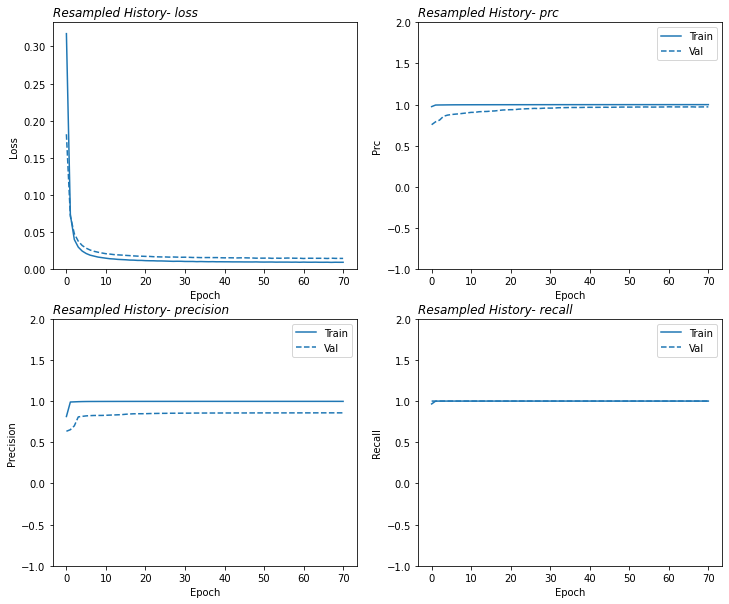

In [68]:
plot_metrics(resampled_history, 'Resampled History')

In [69]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/1000
20/20 [==============================] - 31s 2s/step - loss: 0.3932 - tp: 716891.0000 - fp: 237813.0000 - tn: 681564.0000 - fn: 37685.0000 - accuracy: 0.8354 - precision: 0.7509 - recall: 0.9501 - auc: 0.9621 - prc: 0.9603 - val_loss: 0.2997 - val_tp: 3543.0000 - val_fp: 2983.0000 - val_tn: 167427.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9829 - val_precision: 0.5429 - val_recall: 1.0000 - val_auc: 0.9968 - val_prc: 0.7482
Epoch 2/1000
20/20 [==============================] - 28s 1s/step - loss: 0.1189 - tp: 749952.0000 - fp: 10769.0000 - tn: 738871.0000 - fn: 408.0000 - accuracy: 0.9925 - precision: 0.9858 - recall: 0.9995 - auc: 0.9970 - prc: 0.9939 - val_loss: 0.1142 - val_tp: 3542.0000 - val_fp: 1946.0000 - val_tn: 168464.0000 - val_fn: 1.0000 - val_accuracy: 0.9888 - val_precision: 0.6454 - val_recall: 0.9997 - val_auc: 0.9971 - val_prc: 0.7679
Epoch 3/1000
20/20 [==============================] - 29s 1s/step - loss: 0.0597 - tp: 749900.0000 - fp: 8251.0000 - tn: 74

Epoch 20/1000
20/20 [==============================] - 28s 1s/step - loss: 0.0133 - tp: 749931.0000 - fp: 3186.0000 - tn: 746825.0000 - fn: 58.0000 - accuracy: 0.9978 - precision: 0.9958 - recall: 0.9999 - auc: 0.9989 - prc: 0.9979 - val_loss: 0.0194 - val_tp: 3543.0000 - val_fp: 711.0000 - val_tn: 169699.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9959 - val_precision: 0.8329 - val_recall: 1.0000 - val_auc: 0.9990 - val_prc: 0.9156
Epoch 21/1000
20/20 [==============================] - 28s 1s/step - loss: 0.0132 - tp: 749534.0000 - fp: 3147.0000 - tn: 747254.0000 - fn: 65.0000 - accuracy: 0.9979 - precision: 0.9958 - recall: 0.9999 - auc: 0.9989 - prc: 0.9980 - val_loss: 0.0193 - val_tp: 3543.0000 - val_fp: 705.0000 - val_tn: 169705.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9959 - val_precision: 0.8340 - val_recall: 1.0000 - val_auc: 0.9990 - val_prc: 0.9154
Epoch 22/1000
20/20 [==============================] - 28s 1s/step - loss: 0.0130 - tp: 749961.0000 - fp: 3125.0000 - tn: 7468

Epoch 39/1000
20/20 [==============================] - 28s 1s/step - loss: 0.0107 - tp: 750379.0000 - fp: 2739.0000 - tn: 746863.0000 - fn: 19.0000 - accuracy: 0.9982 - precision: 0.9964 - recall: 1.0000 - auc: 0.9992 - prc: 0.9986 - val_loss: 0.0166 - val_tp: 3543.0000 - val_fp: 618.0000 - val_tn: 169792.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9964 - val_precision: 0.8515 - val_recall: 1.0000 - val_auc: 0.9994 - val_prc: 0.9517
Epoch 40/1000
20/20 [==============================] - 28s 1s/step - loss: 0.0109 - tp: 749802.0000 - fp: 2797.0000 - tn: 747385.0000 - fn: 16.0000 - accuracy: 0.9981 - precision: 0.9963 - recall: 1.0000 - auc: 0.9992 - prc: 0.9986 - val_loss: 0.0165 - val_tp: 3543.0000 - val_fp: 614.0000 - val_tn: 169796.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9965 - val_precision: 0.8523 - val_recall: 1.0000 - val_auc: 0.9994 - val_prc: 0.9525
Epoch 41/1000
20/20 [==============================] - 28s 1s/step - loss: 0.0108 - tp: 750244.0000 - fp: 2758.0000 - tn: 7469

Epoch 58/1000
20/20 [==============================] - 28s 1s/step - loss: 0.0101 - tp: 751262.0000 - fp: 2684.0000 - tn: 746042.0000 - fn: 12.0000 - accuracy: 0.9982 - precision: 0.9964 - recall: 1.0000 - auc: 0.9994 - prc: 0.9989 - val_loss: 0.0157 - val_tp: 3543.0000 - val_fp: 599.0000 - val_tn: 169811.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9966 - val_precision: 0.8554 - val_recall: 1.0000 - val_auc: 0.9995 - val_prc: 0.9657
Epoch 59/1000
20/20 [==============================] - 28s 1s/step - loss: 0.0101 - tp: 750001.0000 - fp: 2698.0000 - tn: 747284.0000 - fn: 17.0000 - accuracy: 0.9982 - precision: 0.9964 - recall: 1.0000 - auc: 0.9994 - prc: 0.9989 - val_loss: 0.0155 - val_tp: 3543.0000 - val_fp: 599.0000 - val_tn: 169811.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9966 - val_precision: 0.8554 - val_recall: 1.0000 - val_auc: 0.9995 - val_prc: 0.9657
Epoch 60/1000
20/20 [==============================] - 28s 1s/step - loss: 0.0101 - tp: 749429.0000 - fp: 2712.0000 - tn: 7478

Epoch 77/1000
20/20 [==============================] - 28s 1s/step - loss: 0.0097 - tp: 750594.0000 - fp: 2654.0000 - tn: 746738.0000 - fn: 14.0000 - accuracy: 0.9982 - precision: 0.9965 - recall: 1.0000 - auc: 0.9995 - prc: 0.9991 - val_loss: 0.0152 - val_tp: 3543.0000 - val_fp: 595.0000 - val_tn: 169815.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9966 - val_precision: 0.8562 - val_recall: 1.0000 - val_auc: 0.9996 - val_prc: 0.9683
Epoch 78/1000
20/20 [==============================] - 28s 1s/step - loss: 0.0098 - tp: 750718.0000 - fp: 2698.0000 - tn: 746575.0000 - fn: 9.0000 - accuracy: 0.9982 - precision: 0.9964 - recall: 1.0000 - auc: 0.9995 - prc: 0.9991 - val_loss: 0.0150 - val_tp: 3543.0000 - val_fp: 594.0000 - val_tn: 169816.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9966 - val_precision: 0.8564 - val_recall: 1.0000 - val_auc: 0.9996 - val_prc: 0.9698
Epoch 79/1000
20/20 [==============================] - 29s 1s/step - loss: 0.0097 - tp: 749045.0000 - fp: 2667.0000 - tn: 74827

Epoch 96/1000
20/20 [==============================] - 28s 1s/step - loss: 0.0095 - tp: 749357.0000 - fp: 2663.0000 - tn: 747967.0000 - fn: 13.0000 - accuracy: 0.9982 - precision: 0.9965 - recall: 1.0000 - auc: 0.9995 - prc: 0.9992 - val_loss: 0.0147 - val_tp: 3543.0000 - val_fp: 591.0000 - val_tn: 169819.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9966 - val_precision: 0.8570 - val_recall: 1.0000 - val_auc: 0.9996 - val_prc: 0.9716
Epoch 97/1000
20/20 [==============================] - 28s 1s/step - loss: 0.0095 - tp: 748892.0000 - fp: 2655.0000 - tn: 748444.0000 - fn: 9.0000 - accuracy: 0.9982 - precision: 0.9965 - recall: 1.0000 - auc: 0.9995 - prc: 0.9992 - val_loss: 0.0146 - val_tp: 3543.0000 - val_fp: 591.0000 - val_tn: 169819.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9966 - val_precision: 0.8570 - val_recall: 1.0000 - val_auc: 0.9996 - val_prc: 0.9721
Epoch 98/1000
20/20 [==============================] - 28s 1s/step - loss: 0.0093 - tp: 750702.0000 - fp: 2625.0000 - tn: 74666

I applied more training in the data above because as we saw above we have overfitting. In addition, I apply break up the epochs to give the callbacks. EarlyStopping finer control over when to stop training. 

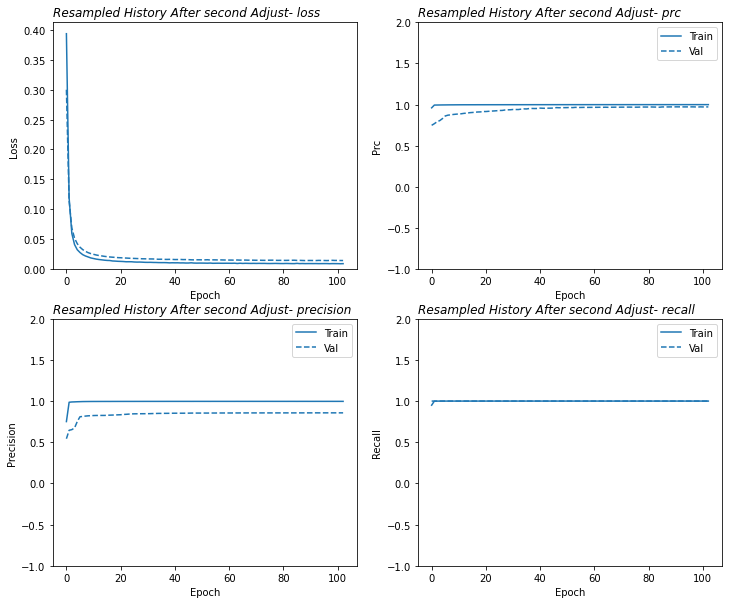

In [70]:
plot_metrics(resampled_history, "Resampled History After second Adjust")

In [71]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

#### Checking the results using Confusion Matrix.

loss :  0.014179098419845104
tp :  4537.0
fp :  716.0
tn :  212187.0
fn :  1.0
accuracy :  0.9967025518417358
precision :  0.8636969327926636
recall :  0.9997796416282654
auc :  0.9996108412742615
prc :  0.972456693649292

Legitimate Transactions Detected (True Negatives):  212187
Legitimate Transactions Incorrectly Detected (False Positives):  716
Fraudulent Transactions Missed (False Negatives):  1
Fraudulent Transactions Detected (True Positives):  4537
Total Fraudulent Transactions:  4538


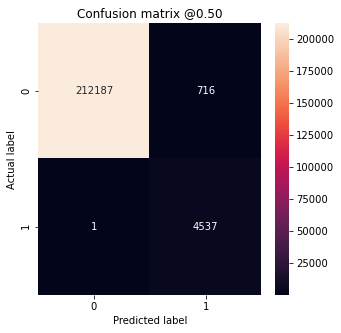

In [72]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

#### Showing the ROC and AUPRCC  

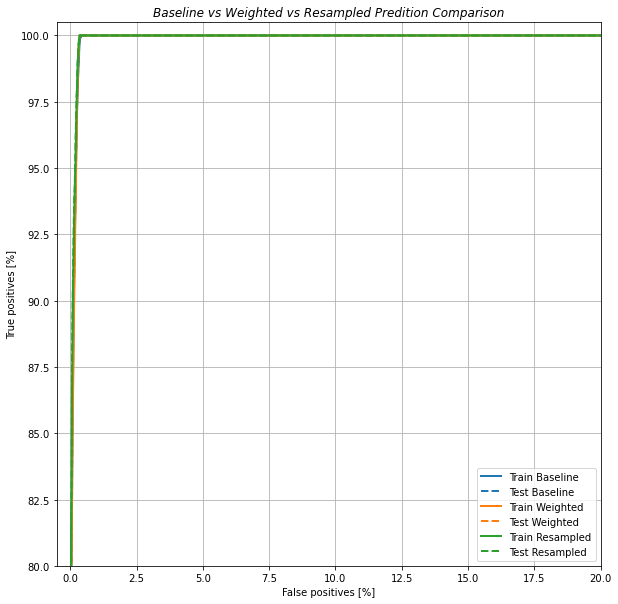

In [73]:
plot_roc("Baseline vs Weighted vs Resampled Predition Comparison","Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Baseline vs Weighted vs Resampled Predition Comparison","Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Baseline vs Weighted vs Resampled Predition Comparison","Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Baseline vs Weighted vs Resampled Predition Comparison","Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Baseline vs Weighted vs Resampled Predition Comparison","Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Baseline vs Weighted vs Resampled Predition Comparison", "Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

In [74]:
def plot_prc(title, name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.xlim([0.6,1.3])
    plt.ylim([0,1.1])
    plt.legend(loc='upper left')
    plt.title(label=title, loc="center", fontstyle='italic')
    ax = plt.gca()
    ax.set_aspect('equal')

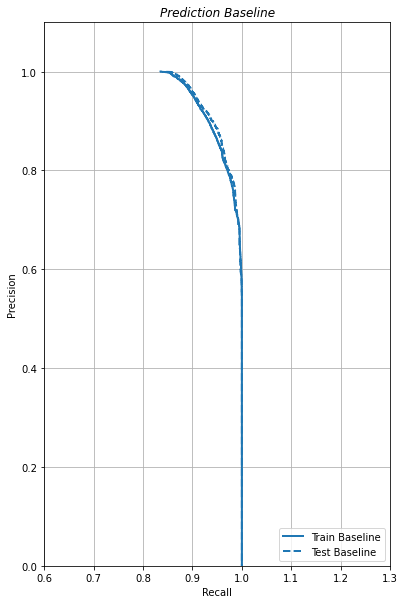

In [75]:
plot_prc("Prediction Baseline","Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Prediction Baseline","Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

### Comparing AUPRC with Baseline, Weighted and Resampled dataset

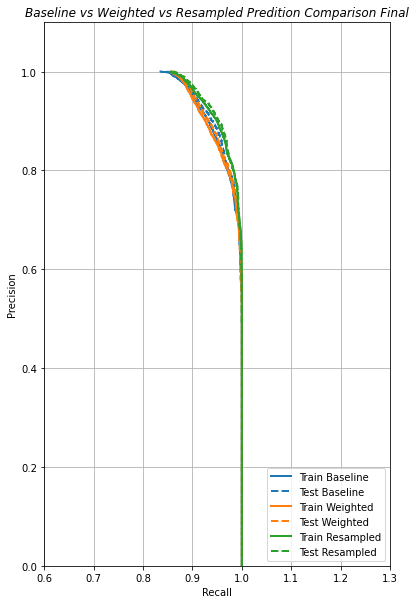

In [76]:
plot_prc("Baseline vs Weighted vs Resampled Predition Comparison Final","Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Baseline vs Weighted vs Resampled Predition Comparison Final","Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_prc("Baseline vs Weighted vs Resampled Predition Comparison Final","Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_prc("Baseline vs Weighted vs Resampled Predition Comparison Final","Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_prc("Baseline vs Weighted vs Resampled Predition Comparison Final","Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_prc("Baseline vs Weighted vs Resampled Predition Comparison Final", "Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

# Second Part of the project
## Classification of the different type of attack categories

In [77]:
DFFinal = optimizeDF(combined_datasets, categorical_df)

(1087203, 201)


In [78]:
combined_datasets['attack_cat'].value_counts()

Normal            1064988
Generic              7522
Exploits             5409
Fuzzers              5051
Reconnaissance       1759
DoS                  1167
Backdoor              534
Analysis              526
Shellcode             223
Worms                  24
Name: attack_cat, dtype: int64

In [79]:
DFFinal = DFFinal[~DFFinal['attack_cat'].isin(['Normal'])]

<Figure size 864x720 with 0 Axes>

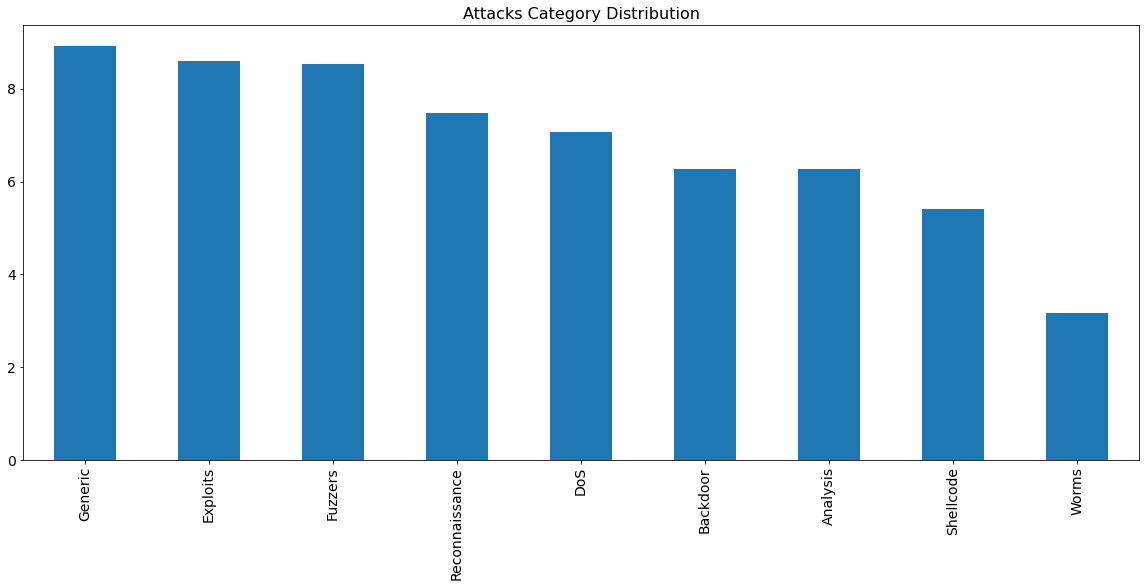

In [80]:
# Distribution grap of the sub-category of attack according to data provided for this project
plt.clf()
plt.figure(figsize=(20,8))
params = {'axes.titlesize':'16','xtick.labelsize':'14','ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
plt.title('Attacks Category Distribution')
DFFinal['attack_cat'].value_counts().apply(np.log).plot(kind='bar')
plt.show()

In [81]:
def LabelCode(value):
    if 'Normal' in value: 
        return 1
    elif 'Generic' in value:
        return 2
    elif 'Exploits' in value:
        return 3
    elif 'Fuzzers' in value:
        return 4
    elif 'DoS' in value:
        return 5
    elif 'Reconnaissance' in value:
        return 6
    elif 'Analysis' in value:
        return 7
    elif 'Backdoor' in value:
        return 8
    elif 'Shellcode' in value:
        return 9
    elif 'Worms' in value:
        return 10
    else:
        return -1
DFFinal['attack_cat']=DFFinal['attack_cat'].apply(LabelCode)

In [82]:
DFFinal['attack_cat'].unique()

array([ 3,  6,  5,  2,  9,  4, 10,  8,  7], dtype=int64)

In [83]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(DFFinal, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('attack_cat'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('attack_cat'))
test_labels = np.array(test_df.pop('attack_cat'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [84]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (14217,)
Validation labels shape: (3555,)
Test labels shape: (4443,)
Training features shape: (14217, 200)
Validation features shape: (3555, 200)
Test features shape: (4443, 200)


In [85]:
metrics1 = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]
#Function to create our Neural Network Model with 6 Hidden layers
def createModel():
    model = Sequential()
    #output dimension in my case would be 217 thanks for the shape of the trainX
    model.add(Dense(200,input_dim =200,activation = 'relu',kernel_initializer='random_uniform'))
    model.add(Dense(100,activation = 'relu',kernel_initializer='random_uniform'))
    model.add(Dense(50,activation = 'relu',kernel_initializer='random_uniform'))
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    # This would refers to the number of attack labels
    model.add(Dense(9,activation='softmax'))
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = metrics1)
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, verbose=1, mode='auto')

    return model

In [86]:
#variables for both models epochs and batchsize
epochs = 500
batch_size = 16
model = KerasClassifier(build_fn=createModel,epochs=epochs,batch_size=batch_size)

In [87]:
modelHistory= model.fit(train_features, train_labels, 
                         validation_data=(val_features, val_labels),verbose=1, validation_split=0.1)

Epoch 1/500
800/800 [==============================] - 5s 6ms/step - loss: 1.6947 - tp: 1093.0000 - fp: 1.0000 - tn: 102359.0000 - fn: 11702.0000 - accuracy: 0.8984 - precision: 0.9991 - recall: 0.0854 - auc: 0.8544 - prc: 0.5762 - val_loss: 1.4478 - val_tp: 453.0000 - val_fp: 0.0000e+00 - val_tn: 11376.0000 - val_fn: 969.0000 - val_accuracy: 0.9243 - val_precision: 1.0000 - val_recall: 0.3186 - val_auc: 0.9023 - val_prc: 0.6542
Epoch 2/500
800/800 [==============================] - 3s 4ms/step - loss: 1.3568 - tp: 4022.0000 - fp: 12.0000 - tn: 102348.0000 - fn: 8773.0000 - accuracy: 0.9237 - precision: 0.9970 - recall: 0.3143 - auc: 0.8994 - prc: 0.6508 - val_loss: 1.2699 - val_tp: 453.0000 - val_fp: 0.0000e+00 - val_tn: 11376.0000 - val_fn: 969.0000 - val_accuracy: 0.9243 - val_precision: 1.0000 - val_recall: 0.3186 - val_auc: 0.9075 - val_prc: 0.6588
Epoch 3/500
800/800 [==============================] - 3s 4ms/step - loss: 1.2404 - tp: 4027.0000 - fp: 12.0000 - tn: 102348.0000 - fn

Epoch 20/500
800/800 [==============================] - 3s 4ms/step - loss: 0.9706 - tp: 4048.0000 - fp: 19.0000 - tn: 102341.0000 - fn: 8747.0000 - accuracy: 0.9239 - precision: 0.9953 - recall: 0.3164 - auc: 0.9402 - prc: 0.7647 - val_loss: 0.9525 - val_tp: 451.0000 - val_fp: 0.0000e+00 - val_tn: 11376.0000 - val_fn: 971.0000 - val_accuracy: 0.9241 - val_precision: 1.0000 - val_recall: 0.3172 - val_auc: 0.9419 - val_prc: 0.7759
Epoch 21/500
800/800 [==============================] - 3s 4ms/step - loss: 0.9572 - tp: 6144.0000 - fp: 1436.0000 - tn: 100924.0000 - fn: 6651.0000 - accuracy: 0.9298 - precision: 0.8106 - recall: 0.4802 - auc: 0.9408 - prc: 0.7681 - val_loss: 0.9298 - val_tp: 742.0000 - val_fp: 172.0000 - val_tn: 11204.0000 - val_fn: 680.0000 - val_accuracy: 0.9334 - val_precision: 0.8118 - val_recall: 0.5218 - val_auc: 0.9441 - val_prc: 0.7794
Epoch 22/500
800/800 [==============================] - 3s 4ms/step - loss: 0.9439 - tp: 6602.0000 - fp: 1689.0000 - tn: 100671.0000

Epoch 39/500
800/800 [==============================] - 3s 4ms/step - loss: 0.8634 - tp: 8601.0000 - fp: 2091.0000 - tn: 100269.0000 - fn: 4194.0000 - accuracy: 0.9454 - precision: 0.8044 - recall: 0.6722 - auc: 0.9517 - prc: 0.8173 - val_loss: 0.8549 - val_tp: 970.0000 - val_fp: 264.0000 - val_tn: 11112.0000 - val_fn: 452.0000 - val_accuracy: 0.9441 - val_precision: 0.7861 - val_recall: 0.6821 - val_auc: 0.9523 - val_prc: 0.8203
Epoch 40/500
800/800 [==============================] - 3s 4ms/step - loss: 0.8601 - tp: 8587.0000 - fp: 2085.0000 - tn: 100275.0000 - fn: 4208.0000 - accuracy: 0.9454 - precision: 0.8046 - recall: 0.6711 - auc: 0.9521 - prc: 0.8182 - val_loss: 0.8562 - val_tp: 989.0000 - val_fp: 314.0000 - val_tn: 11062.0000 - val_fn: 433.0000 - val_accuracy: 0.9416 - val_precision: 0.7590 - val_recall: 0.6955 - val_auc: 0.9523 - val_prc: 0.8120
Epoch 41/500
800/800 [==============================] - 3s 4ms/step - loss: 0.8568 - tp: 8591.0000 - fp: 2097.0000 - tn: 100263.0000

Epoch 58/500
800/800 [==============================] - 3s 4ms/step - loss: 0.8177 - tp: 8598.0000 - fp: 1803.0000 - tn: 100557.0000 - fn: 4197.0000 - accuracy: 0.9479 - precision: 0.8267 - recall: 0.6720 - auc: 0.9569 - prc: 0.8292 - val_loss: 0.8217 - val_tp: 954.0000 - val_fp: 210.0000 - val_tn: 11166.0000 - val_fn: 468.0000 - val_accuracy: 0.9470 - val_precision: 0.8196 - val_recall: 0.6709 - val_auc: 0.9557 - val_prc: 0.8283
Epoch 59/500
800/800 [==============================] - 3s 4ms/step - loss: 0.8187 - tp: 8620.0000 - fp: 1848.0000 - tn: 100512.0000 - fn: 4175.0000 - accuracy: 0.9477 - precision: 0.8235 - recall: 0.6737 - auc: 0.9567 - prc: 0.8291 - val_loss: 0.8280 - val_tp: 973.0000 - val_fp: 239.0000 - val_tn: 11137.0000 - val_fn: 449.0000 - val_accuracy: 0.9462 - val_precision: 0.8028 - val_recall: 0.6842 - val_auc: 0.9555 - val_prc: 0.8286
Epoch 60/500
800/800 [==============================] - 3s 4ms/step - loss: 0.8135 - tp: 8640.0000 - fp: 1847.0000 - tn: 100513.0000

Epoch 77/500
800/800 [==============================] - 3s 4ms/step - loss: 0.7921 - tp: 8671.0000 - fp: 1755.0000 - tn: 100605.0000 - fn: 4124.0000 - accuracy: 0.9489 - precision: 0.8317 - recall: 0.6777 - auc: 0.9593 - prc: 0.8380 - val_loss: 0.8141 - val_tp: 963.0000 - val_fp: 199.0000 - val_tn: 11177.0000 - val_fn: 459.0000 - val_accuracy: 0.9486 - val_precision: 0.8287 - val_recall: 0.6772 - val_auc: 0.9564 - val_prc: 0.8324
Epoch 78/500
800/800 [==============================] - 3s 4ms/step - loss: 0.7889 - tp: 8711.0000 - fp: 1759.0000 - tn: 100601.0000 - fn: 4084.0000 - accuracy: 0.9493 - precision: 0.8320 - recall: 0.6808 - auc: 0.9599 - prc: 0.8394 - val_loss: 0.8305 - val_tp: 968.0000 - val_fp: 210.0000 - val_tn: 11166.0000 - val_fn: 454.0000 - val_accuracy: 0.9481 - val_precision: 0.8217 - val_recall: 0.6807 - val_auc: 0.9550 - val_prc: 0.8284
Epoch 79/500
800/800 [==============================] - 3s 4ms/step - loss: 0.7903 - tp: 8716.0000 - fp: 1766.0000 - tn: 100594.0000

Epoch 96/500
800/800 [==============================] - 3s 4ms/step - loss: 0.7670 - tp: 8756.0000 - fp: 1722.0000 - tn: 100638.0000 - fn: 4039.0000 - accuracy: 0.9500 - precision: 0.8357 - recall: 0.6843 - auc: 0.9626 - prc: 0.8498 - val_loss: 0.8324 - val_tp: 987.0000 - val_fp: 294.0000 - val_tn: 11082.0000 - val_fn: 435.0000 - val_accuracy: 0.9430 - val_precision: 0.7705 - val_recall: 0.6941 - val_auc: 0.9541 - val_prc: 0.8226
Epoch 97/500
800/800 [==============================] - 3s 4ms/step - loss: 0.7649 - tp: 8730.0000 - fp: 1666.0000 - tn: 100694.0000 - fn: 4065.0000 - accuracy: 0.9502 - precision: 0.8397 - recall: 0.6823 - auc: 0.9626 - prc: 0.8483 - val_loss: 0.8386 - val_tp: 954.0000 - val_fp: 218.0000 - val_tn: 11158.0000 - val_fn: 468.0000 - val_accuracy: 0.9464 - val_precision: 0.8140 - val_recall: 0.6709 - val_auc: 0.9548 - val_prc: 0.8270
Epoch 98/500
800/800 [==============================] - 3s 4ms/step - loss: 0.7664 - tp: 8751.0000 - fp: 1734.0000 - tn: 100626.0000

Epoch 115/500
800/800 [==============================] - 3s 4ms/step - loss: 0.7482 - tp: 8769.0000 - fp: 1623.0000 - tn: 100737.0000 - fn: 4026.0000 - accuracy: 0.9509 - precision: 0.8438 - recall: 0.6853 - auc: 0.9647 - prc: 0.8566 - val_loss: 0.8458 - val_tp: 962.0000 - val_fp: 226.0000 - val_tn: 11150.0000 - val_fn: 460.0000 - val_accuracy: 0.9464 - val_precision: 0.8098 - val_recall: 0.6765 - val_auc: 0.9532 - val_prc: 0.8298
Epoch 116/500
800/800 [==============================] - 3s 4ms/step - loss: 0.7515 - tp: 8774.0000 - fp: 1626.0000 - tn: 100734.0000 - fn: 4021.0000 - accuracy: 0.9510 - precision: 0.8437 - recall: 0.6857 - auc: 0.9642 - prc: 0.8545 - val_loss: 0.8462 - val_tp: 955.0000 - val_fp: 200.0000 - val_tn: 11176.0000 - val_fn: 467.0000 - val_accuracy: 0.9479 - val_precision: 0.8268 - val_recall: 0.6716 - val_auc: 0.9534 - val_prc: 0.8292
Epoch 117/500
800/800 [==============================] - 3s 4ms/step - loss: 0.7435 - tp: 8814.0000 - fp: 1633.0000 - tn: 100727.0

Epoch 134/500
800/800 [==============================] - 3s 4ms/step - loss: 0.7324 - tp: 8824.0000 - fp: 1563.0000 - tn: 100797.0000 - fn: 3971.0000 - accuracy: 0.9519 - precision: 0.8495 - recall: 0.6896 - auc: 0.9660 - prc: 0.8621 - val_loss: 0.8527 - val_tp: 963.0000 - val_fp: 240.0000 - val_tn: 11136.0000 - val_fn: 459.0000 - val_accuracy: 0.9454 - val_precision: 0.8005 - val_recall: 0.6772 - val_auc: 0.9524 - val_prc: 0.8293
Epoch 135/500
800/800 [==============================] - 3s 4ms/step - loss: 0.7350 - tp: 8797.0000 - fp: 1522.0000 - tn: 100838.0000 - fn: 3998.0000 - accuracy: 0.9521 - precision: 0.8525 - recall: 0.6875 - auc: 0.9656 - prc: 0.8606 - val_loss: 0.8400 - val_tp: 951.0000 - val_fp: 211.0000 - val_tn: 11165.0000 - val_fn: 471.0000 - val_accuracy: 0.9467 - val_precision: 0.8184 - val_recall: 0.6688 - val_auc: 0.9546 - val_prc: 0.8307
Epoch 136/500
800/800 [==============================] - 3s 4ms/step - loss: 0.7329 - tp: 8827.0000 - fp: 1509.0000 - tn: 100851.0

Epoch 153/500
800/800 [==============================] - 3s 4ms/step - loss: 0.7174 - tp: 8831.0000 - fp: 1241.0000 - tn: 101119.0000 - fn: 3964.0000 - accuracy: 0.9548 - precision: 0.8768 - recall: 0.6902 - auc: 0.9670 - prc: 0.8667 - val_loss: 0.8708 - val_tp: 961.0000 - val_fp: 185.0000 - val_tn: 11191.0000 - val_fn: 461.0000 - val_accuracy: 0.9495 - val_precision: 0.8386 - val_recall: 0.6758 - val_auc: 0.9504 - val_prc: 0.8274
Epoch 154/500
800/800 [==============================] - 3s 4ms/step - loss: 0.7156 - tp: 8844.0000 - fp: 1229.0000 - tn: 101131.0000 - fn: 3951.0000 - accuracy: 0.9550 - precision: 0.8780 - recall: 0.6912 - auc: 0.9672 - prc: 0.8668 - val_loss: 0.8660 - val_tp: 955.0000 - val_fp: 172.0000 - val_tn: 11204.0000 - val_fn: 467.0000 - val_accuracy: 0.9501 - val_precision: 0.8474 - val_recall: 0.6716 - val_auc: 0.9500 - val_prc: 0.8296
Epoch 155/500
800/800 [==============================] - 3s 4ms/step - loss: 0.7130 - tp: 8829.0000 - fp: 1236.0000 - tn: 101124.0

Epoch 172/500
800/800 [==============================] - 3s 4ms/step - loss: 0.7067 - tp: 8835.0000 - fp: 1035.0000 - tn: 101325.0000 - fn: 3960.0000 - accuracy: 0.9566 - precision: 0.8951 - recall: 0.6905 - auc: 0.9677 - prc: 0.8690 - val_loss: 0.8673 - val_tp: 954.0000 - val_fp: 187.0000 - val_tn: 11189.0000 - val_fn: 468.0000 - val_accuracy: 0.9488 - val_precision: 0.8361 - val_recall: 0.6709 - val_auc: 0.9513 - val_prc: 0.8291
Epoch 173/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6971 - tp: 8889.0000 - fp: 1031.0000 - tn: 101329.0000 - fn: 3906.0000 - accuracy: 0.9571 - precision: 0.8961 - recall: 0.6947 - auc: 0.9685 - prc: 0.8718 - val_loss: 0.8734 - val_tp: 941.0000 - val_fp: 159.0000 - val_tn: 11217.0000 - val_fn: 481.0000 - val_accuracy: 0.9500 - val_precision: 0.8555 - val_recall: 0.6617 - val_auc: 0.9493 - val_prc: 0.8226
Epoch 174/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6987 - tp: 8864.0000 - fp: 973.0000 - tn: 101387.00

Epoch 191/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6884 - tp: 8880.0000 - fp: 933.0000 - tn: 101427.0000 - fn: 3915.0000 - accuracy: 0.9579 - precision: 0.9049 - recall: 0.6940 - auc: 0.9692 - prc: 0.8733 - val_loss: 0.8972 - val_tp: 946.0000 - val_fp: 165.0000 - val_tn: 11211.0000 - val_fn: 476.0000 - val_accuracy: 0.9499 - val_precision: 0.8515 - val_recall: 0.6653 - val_auc: 0.9470 - val_prc: 0.8251
Epoch 192/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6848 - tp: 8887.0000 - fp: 927.0000 - tn: 101433.0000 - fn: 3908.0000 - accuracy: 0.9580 - precision: 0.9055 - recall: 0.6946 - auc: 0.9697 - prc: 0.8754 - val_loss: 0.8819 - val_tp: 948.0000 - val_fp: 146.0000 - val_tn: 11230.0000 - val_fn: 474.0000 - val_accuracy: 0.9516 - val_precision: 0.8665 - val_recall: 0.6667 - val_auc: 0.9485 - val_prc: 0.8272
Epoch 193/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6851 - tp: 8875.0000 - fp: 862.0000 - tn: 101498.0000

Epoch 210/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6746 - tp: 8901.0000 - fp: 834.0000 - tn: 101526.0000 - fn: 3894.0000 - accuracy: 0.9589 - precision: 0.9143 - recall: 0.6957 - auc: 0.9703 - prc: 0.8771 - val_loss: 0.9152 - val_tp: 929.0000 - val_fp: 166.0000 - val_tn: 11210.0000 - val_fn: 493.0000 - val_accuracy: 0.9485 - val_precision: 0.8484 - val_recall: 0.6533 - val_auc: 0.9451 - val_prc: 0.8160
Epoch 211/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6734 - tp: 8912.0000 - fp: 807.0000 - tn: 101553.0000 - fn: 3883.0000 - accuracy: 0.9593 - precision: 0.9170 - recall: 0.6965 - auc: 0.9704 - prc: 0.8775 - val_loss: 0.9041 - val_tp: 940.0000 - val_fp: 163.0000 - val_tn: 11213.0000 - val_fn: 482.0000 - val_accuracy: 0.9496 - val_precision: 0.8522 - val_recall: 0.6610 - val_auc: 0.9469 - val_prc: 0.8208
Epoch 212/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6688 - tp: 8899.0000 - fp: 784.0000 - tn: 101576.0000

Epoch 229/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6578 - tp: 8964.0000 - fp: 749.0000 - tn: 101611.0000 - fn: 3831.0000 - accuracy: 0.9602 - precision: 0.9229 - recall: 0.7006 - auc: 0.9717 - prc: 0.8813 - val_loss: 0.9126 - val_tp: 943.0000 - val_fp: 151.0000 - val_tn: 11225.0000 - val_fn: 479.0000 - val_accuracy: 0.9508 - val_precision: 0.8620 - val_recall: 0.6632 - val_auc: 0.9474 - val_prc: 0.8258
Epoch 230/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6651 - tp: 8920.0000 - fp: 737.0000 - tn: 101623.0000 - fn: 3875.0000 - accuracy: 0.9599 - precision: 0.9237 - recall: 0.6971 - auc: 0.9708 - prc: 0.8796 - val_loss: 0.9367 - val_tp: 947.0000 - val_fp: 162.0000 - val_tn: 11214.0000 - val_fn: 475.0000 - val_accuracy: 0.9502 - val_precision: 0.8539 - val_recall: 0.6660 - val_auc: 0.9456 - val_prc: 0.8227
Epoch 231/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6696 - tp: 8909.0000 - fp: 734.0000 - tn: 101626.0000

Epoch 248/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6481 - tp: 8972.0000 - fp: 665.0000 - tn: 101695.0000 - fn: 3823.0000 - accuracy: 0.9610 - precision: 0.9310 - recall: 0.7012 - auc: 0.9722 - prc: 0.8838 - val_loss: 0.9120 - val_tp: 945.0000 - val_fp: 154.0000 - val_tn: 11222.0000 - val_fn: 477.0000 - val_accuracy: 0.9507 - val_precision: 0.8599 - val_recall: 0.6646 - val_auc: 0.9474 - val_prc: 0.8263
Epoch 249/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6616 - tp: 8971.0000 - fp: 707.0000 - tn: 101653.0000 - fn: 3824.0000 - accuracy: 0.9607 - precision: 0.9269 - recall: 0.7011 - auc: 0.9713 - prc: 0.8818 - val_loss: 0.9431 - val_tp: 944.0000 - val_fp: 143.0000 - val_tn: 11233.0000 - val_fn: 478.0000 - val_accuracy: 0.9515 - val_precision: 0.8684 - val_recall: 0.6639 - val_auc: 0.9450 - val_prc: 0.8197
Epoch 250/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6596 - tp: 8948.0000 - fp: 713.0000 - tn: 101647.0000

Epoch 267/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6474 - tp: 8956.0000 - fp: 634.0000 - tn: 101726.0000 - fn: 3839.0000 - accuracy: 0.9612 - precision: 0.9339 - recall: 0.7000 - auc: 0.9723 - prc: 0.8842 - val_loss: 0.9547 - val_tp: 949.0000 - val_fp: 156.0000 - val_tn: 11220.0000 - val_fn: 473.0000 - val_accuracy: 0.9509 - val_precision: 0.8588 - val_recall: 0.6674 - val_auc: 0.9453 - val_prc: 0.8242
Epoch 268/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6489 - tp: 8960.0000 - fp: 632.0000 - tn: 101728.0000 - fn: 3835.0000 - accuracy: 0.9612 - precision: 0.9341 - recall: 0.7003 - auc: 0.9718 - prc: 0.8834 - val_loss: 0.9696 - val_tp: 947.0000 - val_fp: 145.0000 - val_tn: 11231.0000 - val_fn: 475.0000 - val_accuracy: 0.9516 - val_precision: 0.8672 - val_recall: 0.6660 - val_auc: 0.9442 - val_prc: 0.8184
Epoch 269/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6444 - tp: 8976.0000 - fp: 634.0000 - tn: 101726.0000

Epoch 286/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6451 - tp: 8996.0000 - fp: 594.0000 - tn: 101766.0000 - fn: 3799.0000 - accuracy: 0.9619 - precision: 0.9381 - recall: 0.7031 - auc: 0.9725 - prc: 0.8854 - val_loss: 0.9428 - val_tp: 946.0000 - val_fp: 139.0000 - val_tn: 11237.0000 - val_fn: 476.0000 - val_accuracy: 0.9519 - val_precision: 0.8719 - val_recall: 0.6653 - val_auc: 0.9441 - val_prc: 0.8194
Epoch 287/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6434 - tp: 9005.0000 - fp: 641.0000 - tn: 101719.0000 - fn: 3790.0000 - accuracy: 0.9615 - precision: 0.9335 - recall: 0.7038 - auc: 0.9723 - prc: 0.8854 - val_loss: 0.9411 - val_tp: 938.0000 - val_fp: 134.0000 - val_tn: 11242.0000 - val_fn: 484.0000 - val_accuracy: 0.9517 - val_precision: 0.8750 - val_recall: 0.6596 - val_auc: 0.9430 - val_prc: 0.8149
Epoch 288/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6479 - tp: 8961.0000 - fp: 547.0000 - tn: 101813.0000

Epoch 305/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6424 - tp: 8990.0000 - fp: 556.0000 - tn: 101804.0000 - fn: 3805.0000 - accuracy: 0.9621 - precision: 0.9418 - recall: 0.7026 - auc: 0.9724 - prc: 0.8854 - val_loss: 0.9941 - val_tp: 938.0000 - val_fp: 159.0000 - val_tn: 11217.0000 - val_fn: 484.0000 - val_accuracy: 0.9498 - val_precision: 0.8551 - val_recall: 0.6596 - val_auc: 0.9405 - val_prc: 0.8139
Epoch 306/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6285 - tp: 9026.0000 - fp: 508.0000 - tn: 101852.0000 - fn: 3769.0000 - accuracy: 0.9629 - precision: 0.9467 - recall: 0.7054 - auc: 0.9735 - prc: 0.8887 - val_loss: 0.9804 - val_tp: 946.0000 - val_fp: 166.0000 - val_tn: 11210.0000 - val_fn: 476.0000 - val_accuracy: 0.9498 - val_precision: 0.8507 - val_recall: 0.6653 - val_auc: 0.9418 - val_prc: 0.8170
Epoch 307/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6359 - tp: 8989.0000 - fp: 557.0000 - tn: 101803.0000

Epoch 324/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6342 - tp: 9003.0000 - fp: 560.0000 - tn: 101800.0000 - fn: 3792.0000 - accuracy: 0.9622 - precision: 0.9414 - recall: 0.7036 - auc: 0.9729 - prc: 0.8867 - val_loss: 0.9980 - val_tp: 936.0000 - val_fp: 171.0000 - val_tn: 11205.0000 - val_fn: 486.0000 - val_accuracy: 0.9487 - val_precision: 0.8455 - val_recall: 0.6582 - val_auc: 0.9410 - val_prc: 0.8171
Epoch 325/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6301 - tp: 9011.0000 - fp: 505.0000 - tn: 101855.0000 - fn: 3784.0000 - accuracy: 0.9628 - precision: 0.9469 - recall: 0.7043 - auc: 0.9731 - prc: 0.8886 - val_loss: 0.9574 - val_tp: 944.0000 - val_fp: 145.0000 - val_tn: 11231.0000 - val_fn: 478.0000 - val_accuracy: 0.9513 - val_precision: 0.8669 - val_recall: 0.6639 - val_auc: 0.9444 - val_prc: 0.8234
Epoch 326/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6263 - tp: 9017.0000 - fp: 527.0000 - tn: 101833.0000

Epoch 343/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6195 - tp: 9034.0000 - fp: 467.0000 - tn: 101893.0000 - fn: 3761.0000 - accuracy: 0.9633 - precision: 0.9508 - recall: 0.7061 - auc: 0.9739 - prc: 0.8907 - val_loss: 0.9588 - val_tp: 939.0000 - val_fp: 143.0000 - val_tn: 11233.0000 - val_fn: 483.0000 - val_accuracy: 0.9511 - val_precision: 0.8678 - val_recall: 0.6603 - val_auc: 0.9441 - val_prc: 0.8220
Epoch 344/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6242 - tp: 9026.0000 - fp: 520.0000 - tn: 101840.0000 - fn: 3769.0000 - accuracy: 0.9628 - precision: 0.9455 - recall: 0.7054 - auc: 0.9735 - prc: 0.8891 - val_loss: 0.9800 - val_tp: 944.0000 - val_fp: 148.0000 - val_tn: 11228.0000 - val_fn: 478.0000 - val_accuracy: 0.9511 - val_precision: 0.8645 - val_recall: 0.6639 - val_auc: 0.9442 - val_prc: 0.8174
Epoch 345/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6231 - tp: 9039.0000 - fp: 476.0000 - tn: 101884.0000

Epoch 362/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6229 - tp: 9039.0000 - fp: 468.0000 - tn: 101892.0000 - fn: 3756.0000 - accuracy: 0.9633 - precision: 0.9508 - recall: 0.7064 - auc: 0.9737 - prc: 0.8900 - val_loss: 0.9919 - val_tp: 940.0000 - val_fp: 150.0000 - val_tn: 11226.0000 - val_fn: 482.0000 - val_accuracy: 0.9506 - val_precision: 0.8624 - val_recall: 0.6610 - val_auc: 0.9425 - val_prc: 0.8190
Epoch 363/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6185 - tp: 9041.0000 - fp: 453.0000 - tn: 101907.0000 - fn: 3754.0000 - accuracy: 0.9635 - precision: 0.9523 - recall: 0.7066 - auc: 0.9740 - prc: 0.8913 - val_loss: 0.9882 - val_tp: 939.0000 - val_fp: 150.0000 - val_tn: 11226.0000 - val_fn: 483.0000 - val_accuracy: 0.9505 - val_precision: 0.8623 - val_recall: 0.6603 - val_auc: 0.9422 - val_prc: 0.8170
Epoch 364/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6205 - tp: 9037.0000 - fp: 482.0000 - tn: 101878.0000

Epoch 381/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6196 - tp: 9040.0000 - fp: 462.0000 - tn: 101898.0000 - fn: 3755.0000 - accuracy: 0.9634 - precision: 0.9514 - recall: 0.7065 - auc: 0.9737 - prc: 0.8906 - val_loss: 1.0000 - val_tp: 939.0000 - val_fp: 159.0000 - val_tn: 11217.0000 - val_fn: 483.0000 - val_accuracy: 0.9498 - val_precision: 0.8552 - val_recall: 0.6603 - val_auc: 0.9414 - val_prc: 0.8158
Epoch 382/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6277 - tp: 9023.0000 - fp: 457.0000 - tn: 101903.0000 - fn: 3772.0000 - accuracy: 0.9633 - precision: 0.9518 - recall: 0.7052 - auc: 0.9730 - prc: 0.8892 - val_loss: 1.0060 - val_tp: 946.0000 - val_fp: 151.0000 - val_tn: 11225.0000 - val_fn: 476.0000 - val_accuracy: 0.9510 - val_precision: 0.8624 - val_recall: 0.6653 - val_auc: 0.9419 - val_prc: 0.8170
Epoch 383/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6275 - tp: 9023.0000 - fp: 455.0000 - tn: 101905.0000

Epoch 400/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6129 - tp: 9026.0000 - fp: 455.0000 - tn: 101905.0000 - fn: 3769.0000 - accuracy: 0.9633 - precision: 0.9520 - recall: 0.7054 - auc: 0.9743 - prc: 0.8914 - val_loss: 1.0521 - val_tp: 937.0000 - val_fp: 155.0000 - val_tn: 11221.0000 - val_fn: 485.0000 - val_accuracy: 0.9500 - val_precision: 0.8581 - val_recall: 0.6589 - val_auc: 0.9405 - val_prc: 0.8156
Epoch 401/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6174 - tp: 9049.0000 - fp: 485.0000 - tn: 101875.0000 - fn: 3746.0000 - accuracy: 0.9633 - precision: 0.9491 - recall: 0.7072 - auc: 0.9738 - prc: 0.8914 - val_loss: 0.9956 - val_tp: 940.0000 - val_fp: 147.0000 - val_tn: 11229.0000 - val_fn: 482.0000 - val_accuracy: 0.9509 - val_precision: 0.8648 - val_recall: 0.6610 - val_auc: 0.9445 - val_prc: 0.8198
Epoch 402/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6077 - tp: 9078.0000 - fp: 416.0000 - tn: 101944.0000

Epoch 419/500
800/800 [==============================] - 4s 5ms/step - loss: 0.6060 - tp: 9060.0000 - fp: 400.0000 - tn: 101960.0000 - fn: 3735.0000 - accuracy: 0.9641 - precision: 0.9577 - recall: 0.7081 - auc: 0.9747 - prc: 0.8938 - val_loss: 1.0003 - val_tp: 929.0000 - val_fp: 146.0000 - val_tn: 11230.0000 - val_fn: 493.0000 - val_accuracy: 0.9501 - val_precision: 0.8642 - val_recall: 0.6533 - val_auc: 0.9427 - val_prc: 0.8171
Epoch 420/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6232 - tp: 8999.0000 - fp: 474.0000 - tn: 101886.0000 - fn: 3796.0000 - accuracy: 0.9629 - precision: 0.9500 - recall: 0.7033 - auc: 0.9732 - prc: 0.8893 - val_loss: 1.0381 - val_tp: 938.0000 - val_fp: 153.0000 - val_tn: 11223.0000 - val_fn: 484.0000 - val_accuracy: 0.9502 - val_precision: 0.8598 - val_recall: 0.6596 - val_auc: 0.9400 - val_prc: 0.8139
Epoch 421/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6216 - tp: 9020.0000 - fp: 469.0000 - tn: 101891.0000

Epoch 438/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6125 - tp: 9054.0000 - fp: 391.0000 - tn: 101969.0000 - fn: 3741.0000 - accuracy: 0.9641 - precision: 0.9586 - recall: 0.7076 - auc: 0.9739 - prc: 0.8928 - val_loss: 1.0548 - val_tp: 936.0000 - val_fp: 164.0000 - val_tn: 11212.0000 - val_fn: 486.0000 - val_accuracy: 0.9492 - val_precision: 0.8509 - val_recall: 0.6582 - val_auc: 0.9403 - val_prc: 0.8084
Epoch 439/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6256 - tp: 9012.0000 - fp: 452.0000 - tn: 101908.0000 - fn: 3783.0000 - accuracy: 0.9632 - precision: 0.9522 - recall: 0.7043 - auc: 0.9730 - prc: 0.8890 - val_loss: 0.9968 - val_tp: 934.0000 - val_fp: 140.0000 - val_tn: 11236.0000 - val_fn: 488.0000 - val_accuracy: 0.9509 - val_precision: 0.8696 - val_recall: 0.6568 - val_auc: 0.9429 - val_prc: 0.8228
Epoch 440/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6469 - tp: 8931.0000 - fp: 532.0000 - tn: 101828.0000

800/800 [==============================] - 3s 4ms/step - loss: 0.6199 - tp: 9021.0000 - fp: 444.0000 - tn: 101916.0000 - fn: 3774.0000 - accuracy: 0.9634 - precision: 0.9531 - recall: 0.7050 - auc: 0.9733 - prc: 0.8907 - val_loss: 1.0212 - val_tp: 928.0000 - val_fp: 137.0000 - val_tn: 11239.0000 - val_fn: 494.0000 - val_accuracy: 0.9507 - val_precision: 0.8714 - val_recall: 0.6526 - val_auc: 0.9418 - val_prc: 0.8117
Epoch 457/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6033 - tp: 9067.0000 - fp: 374.0000 - tn: 101986.0000 - fn: 3728.0000 - accuracy: 0.9644 - precision: 0.9604 - recall: 0.7086 - auc: 0.9749 - prc: 0.8947 - val_loss: 1.0337 - val_tp: 938.0000 - val_fp: 145.0000 - val_tn: 11231.0000 - val_fn: 484.0000 - val_accuracy: 0.9509 - val_precision: 0.8661 - val_recall: 0.6596 - val_auc: 0.9402 - val_prc: 0.8103
Epoch 458/500
800/800 [==============================] - 3s 4ms/step - loss: 0.5978 - tp: 9094.0000 - fp: 336.0000 - tn: 102024.0000 - fn: 3701.00

Epoch 475/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6062 - tp: 9063.0000 - fp: 387.0000 - tn: 101973.0000 - fn: 3732.0000 - accuracy: 0.9642 - precision: 0.9590 - recall: 0.7083 - auc: 0.9747 - prc: 0.8939 - val_loss: 1.0596 - val_tp: 933.0000 - val_fp: 136.0000 - val_tn: 11240.0000 - val_fn: 489.0000 - val_accuracy: 0.9512 - val_precision: 0.8728 - val_recall: 0.6561 - val_auc: 0.9401 - val_prc: 0.8115
Epoch 476/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6042 - tp: 9051.0000 - fp: 375.0000 - tn: 101985.0000 - fn: 3744.0000 - accuracy: 0.9642 - precision: 0.9602 - recall: 0.7074 - auc: 0.9748 - prc: 0.8944 - val_loss: 1.0751 - val_tp: 929.0000 - val_fp: 168.0000 - val_tn: 11208.0000 - val_fn: 493.0000 - val_accuracy: 0.9484 - val_precision: 0.8469 - val_recall: 0.6533 - val_auc: 0.9391 - val_prc: 0.8059
Epoch 477/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6078 - tp: 9050.0000 - fp: 416.0000 - tn: 101944.0000

Epoch 494/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6014 - tp: 9082.0000 - fp: 383.0000 - tn: 101977.0000 - fn: 3713.0000 - accuracy: 0.9644 - precision: 0.9595 - recall: 0.7098 - auc: 0.9751 - prc: 0.8955 - val_loss: 1.0511 - val_tp: 924.0000 - val_fp: 159.0000 - val_tn: 11217.0000 - val_fn: 498.0000 - val_accuracy: 0.9487 - val_precision: 0.8532 - val_recall: 0.6498 - val_auc: 0.9372 - val_prc: 0.8068
Epoch 495/500
800/800 [==============================] - 3s 4ms/step - loss: 0.6015 - tp: 9076.0000 - fp: 355.0000 - tn: 102005.0000 - fn: 3719.0000 - accuracy: 0.9646 - precision: 0.9624 - recall: 0.7093 - auc: 0.9748 - prc: 0.8956 - val_loss: 1.0653 - val_tp: 926.0000 - val_fp: 144.0000 - val_tn: 11232.0000 - val_fn: 496.0000 - val_accuracy: 0.9500 - val_precision: 0.8654 - val_recall: 0.6512 - val_auc: 0.9406 - val_prc: 0.8119
Epoch 496/500
800/800 [==============================] - 3s 4ms/step - loss: 0.5912 - tp: 9082.0000 - fp: 328.0000 - tn: 102032.0000

In [88]:
 #function used to create quick graphs for a given column Name
def plotGraph(columnName):
    plt.title(columnName)
    df[columnName].value_counts().plot(kind="bar")

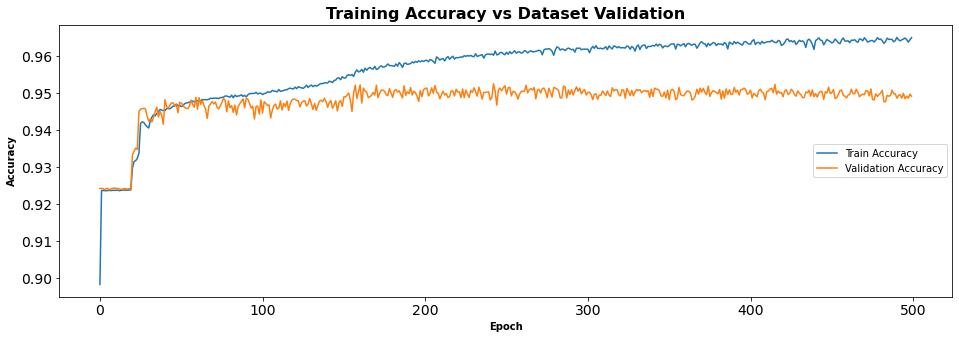

In [89]:
# plot the training/validation accuracy
fig = plt.figure(figsize = [16,5])
plt.title("Training Accuracy vs Dataset Validation", weight="bold")
plt.xlabel("Epoch", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.plot(np.arange(0, epochs), modelHistory.history["accuracy"], label="Train Accuracy")
plt.plot(np.arange(0, epochs), modelHistory.history["val_accuracy"], label="Validation Accuracy")
plt.legend(loc="right");
plt.show()

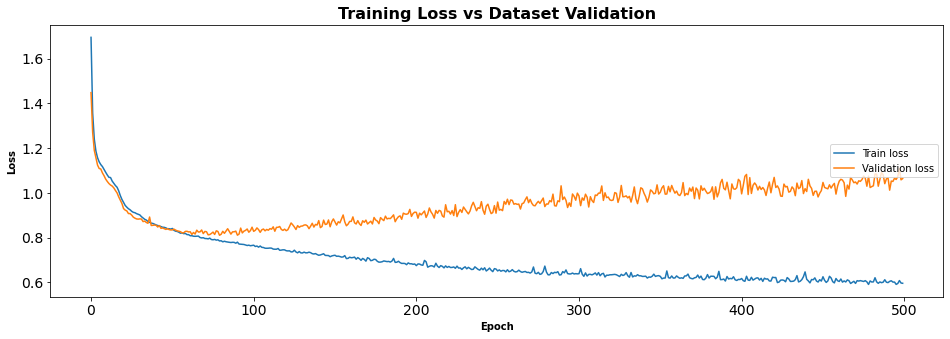

In [90]:
# plot the training/validation loss
fig= plt.figure(figsize = [16,5])
plt.title("Training Loss vs Dataset Validation", weight="bold")
plt.xlabel("Epoch", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.plot(np.arange(0, epochs), modelHistory.history["loss"], label="Train loss")
plt.plot(np.arange(0, epochs), modelHistory.history["val_loss"], label="Validation loss")
plt.legend(loc="right");
plt.show()

In [91]:
np.bincount(DFFinal['attack_cat'])

array([   0,    0, 7522, 5409, 5051, 1167, 1759,  526,  534,  223,   24],
      dtype=int64)

In [92]:
DFFinal['attack_cat'].value_counts()

2     7522
3     5409
4     5051
6     1759
5     1167
8      534
7      526
9      223
10      24
Name: attack_cat, dtype: int64

In [93]:
class_labels

['Normal',
 'Generic',
 'Exploits',
 'Fuzzers',
 'DoS',
 'Reconnaissance',
 'Analysis',
 'Backdoor',
 'Shellcode',
 'Worms']

In [94]:
combined_datasets['attack_cat'].value_counts()

Normal            1064988
Generic              7522
Exploits             5409
Fuzzers              5051
Reconnaissance       1759
DoS                  1167
Backdoor              534
Analysis              526
Shellcode             223
Worms                  24
Name: attack_cat, dtype: int64

In [95]:
cero, Normal, Generic , Exploits , Fuzzers , DoS , Reconnaissance , Analysis , Backdoor , Shellcode , Worms = np.bincount(DFFinal['attack_cat'])

In [96]:
totalLabel = Generic + Exploits + Fuzzers + DoS + Reconnaissance + Analysis + Backdoor + Shellcode + Worms
totalLabel 

22215

In [97]:
print('Generic {} ({:.2f}% of total)\n \n'.format(Generic, 100 * Generic / totalLabel))

Generic 7522 (33.86% of total)
 



In [98]:
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    
    total, pos, 100 * pos / total))

Examples:
    Total: 1087203
    Positive: 22215 (2.04% of total)



In [99]:
print('Generic: {} ({:.2f}% of total)\nExploits: {} ({:.2f}% of total)\nFuzzers: {} ({:.2f}% of total)\nDoS: {} ({:.2f}% of total)\nReconnaissance: {} ({:.2f}% of total)\nAnalysis: {} ({:.2f}% of total)\nBackdoor: {} ({:.2f}% of total)\nShellcode: {} ({:.2f}% of total)\nWorms: {} ({:.2f}% of total)\n'.format(
    Generic, 100 * (Generic / totalLabel),
    Exploits, 100 * Exploits / totalLabel,
    Fuzzers, 100 * Fuzzers / totalLabel,
    DoS, 100 * DoS / totalLabel,
    Reconnaissance, 100 * Reconnaissance / totalLabel,
    Analysis, 100 * Analysis / totalLabel,
    Backdoor, 100 * Backdoor / totalLabel,
    Shellcode, 100 * Shellcode / totalLabel,
    Worms, 100 * Worms / totalLabel))


Generic: 7522 (33.86% of total)
Exploits: 5409 (24.35% of total)
Fuzzers: 5051 (22.74% of total)
DoS: 1167 (5.25% of total)
Reconnaissance: 1759 (7.92% of total)
Analysis: 526 (2.37% of total)
Backdoor: 534 (2.40% of total)
Shellcode: 223 (1.00% of total)
Worms: 24 (0.11% of total)



In [100]:
percentangeLabel = [100 * (Generic / totalLabel),100 * Exploits / totalLabel,100 * Fuzzers / totalLabel,100 * DoS / totalLabel,100 * Reconnaissance / totalLabel,100 * Analysis / totalLabel,100 * Backdoor / totalLabel,100 * Shellcode / totalLabel,100 * Worms / totalLabel]
percentangeLabel

[33.860004501462974,
 24.348413234301148,
 22.736889489083953,
 5.25320729237002,
 7.9180733738465,
 2.3677695250956563,
 2.4037812288993923,
 1.003826243529147,
 0.10803511141120864]

In [101]:
import plotly.graph_objects as go

class_labels = ['Generic','Exploits','Fuzzers','DoS','Reconnaissance','Analysis','Backdoor','Shellcode' ,'Worms']
percentangeLabel = [100 * (Generic / totalLabel),100 * Exploits / totalLabel,100 * Fuzzers / totalLabel,100 * DoS / totalLabel,100 * Reconnaissance / totalLabel,100 * Analysis / totalLabel,100 * Backdoor / totalLabel,100 * Shellcode / totalLabel,100 * Worms / totalLabel]


fig = go.Figure(data=[go.Bar(
    x=class_labels,
    y=percentangeLabel
    
)])
fig.update_layout(title_text='Distribution of Attack Category')

In [102]:
epochs = 150
model = KerasClassifier(build_fn=createModel,epochs=epochs,batch_size=batch_size,steps_per_epoch =200 )

In [103]:
modelHistory2= model.fit(train_features, train_labels, validation_data=(val_features, val_labels),verbose=1, validation_split=0.2)

Epoch 1/150
200/200 [==============================] - 3s 14ms/step - loss: 2.0239 - tp: 925.0000 - fp: 153.0000 - tn: 36823.0000 - fn: 3697.0000 - accuracy: 0.9074 - precision: 0.8581 - recall: 0.2001 - auc: 0.8085 - prc: 0.4845 - val_loss: 1.9164 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 22752.0000 - val_fn: 2844.0000 - val_accuracy: 0.8889 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8148 - val_prc: 0.3702
Epoch 2/150
200/200 [==============================] - 1s 5ms/step - loss: 1.8551 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 25600.0000 - fn: 3200.0000 - accuracy: 0.8889 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.8314 - prc: 0.3993 - val_loss: 1.7885 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 22752.0000 - val_fn: 2844.0000 - val_accuracy: 0.8889 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8501 - val_prc: 0.4707
Epoch 3/150
200/200 [==============================] - 1s 6ms/step - loss: 1.7421 - tp: 0.0000e+00 - 

200/200 [==============================] - 1s 5ms/step - loss: 1.1905 - tp: 1017.0000 - fp: 10.0000 - tn: 25590.0000 - fn: 2183.0000 - accuracy: 0.9239 - precision: 0.9903 - recall: 0.3178 - auc: 0.9104 - prc: 0.6887 - val_loss: 1.1881 - val_tp: 915.0000 - val_fp: 0.0000e+00 - val_tn: 22752.0000 - val_fn: 1929.0000 - val_accuracy: 0.9246 - val_precision: 1.0000 - val_recall: 0.3217 - val_auc: 0.9092 - val_prc: 0.6901
Epoch 20/150
200/200 [==============================] - 1s 5ms/step - loss: 1.1817 - tp: 1018.0000 - fp: 7.0000 - tn: 25593.0000 - fn: 2182.0000 - accuracy: 0.9240 - precision: 0.9932 - recall: 0.3181 - auc: 0.9102 - prc: 0.6896 - val_loss: 1.1780 - val_tp: 919.0000 - val_fp: 4.0000 - val_tn: 22748.0000 - val_fn: 1925.0000 - val_accuracy: 0.9246 - val_precision: 0.9957 - val_recall: 0.3231 - val_auc: 0.9111 - val_prc: 0.6946
Epoch 21/150
200/200 [==============================] - 1s 5ms/step - loss: 1.1999 - tp: 999.0000 - fp: 6.0000 - tn: 25594.0000 - fn: 2201.0000 - accu

200/200 [==============================] - 1s 6ms/step - loss: 1.1150 - tp: 997.0000 - fp: 7.0000 - tn: 25593.0000 - fn: 2203.0000 - accuracy: 0.9233 - precision: 0.9930 - recall: 0.3116 - auc: 0.9206 - prc: 0.6954 - val_loss: 1.1058 - val_tp: 915.0000 - val_fp: 2.0000 - val_tn: 22750.0000 - val_fn: 1929.0000 - val_accuracy: 0.9246 - val_precision: 0.9978 - val_recall: 0.3217 - val_auc: 0.9195 - val_prc: 0.6929
Epoch 39/150
200/200 [==============================] - 1s 6ms/step - loss: 1.1311 - tp: 987.0000 - fp: 2.0000 - tn: 25598.0000 - fn: 2213.0000 - accuracy: 0.9231 - precision: 0.9980 - recall: 0.3084 - auc: 0.9161 - prc: 0.6778 - val_loss: 1.1069 - val_tp: 921.0000 - val_fp: 9.0000 - val_tn: 22743.0000 - val_fn: 1923.0000 - val_accuracy: 0.9245 - val_precision: 0.9903 - val_recall: 0.3238 - val_auc: 0.9212 - val_prc: 0.7013
Epoch 40/150
200/200 [==============================] - 1s 6ms/step - loss: 1.1291 - tp: 995.0000 - fp: 9.0000 - tn: 25567.0000 - fn: 2202.0000 - accuracy: 0

200/200 [==============================] - 1s 5ms/step - loss: 1.1044 - tp: 1049.0000 - fp: 6.0000 - tn: 25570.0000 - fn: 2148.0000 - accuracy: 0.9251 - precision: 0.9943 - recall: 0.3281 - auc: 0.9199 - prc: 0.6960 - val_loss: 1.0827 - val_tp: 920.0000 - val_fp: 4.0000 - val_tn: 22748.0000 - val_fn: 1924.0000 - val_accuracy: 0.9247 - val_precision: 0.9957 - val_recall: 0.3235 - val_auc: 0.9231 - val_prc: 0.6904
Epoch 58/150
200/200 [==============================] - 1s 5ms/step - loss: 1.0996 - tp: 993.0000 - fp: 5.0000 - tn: 25595.0000 - fn: 2207.0000 - accuracy: 0.9232 - precision: 0.9950 - recall: 0.3103 - auc: 0.9211 - prc: 0.6839 - val_loss: 1.0790 - val_tp: 918.0000 - val_fp: 4.0000 - val_tn: 22748.0000 - val_fn: 1926.0000 - val_accuracy: 0.9246 - val_precision: 0.9957 - val_recall: 0.3228 - val_auc: 0.9235 - val_prc: 0.6973
Epoch 59/150
200/200 [==============================] - 1s 5ms/step - loss: 1.0820 - tp: 992.0000 - fp: 6.0000 - tn: 25594.0000 - fn: 2208.0000 - accuracy: 

200/200 [==============================] - 1s 5ms/step - loss: 1.0767 - tp: 993.0000 - fp: 4.0000 - tn: 25596.0000 - fn: 2207.0000 - accuracy: 0.9232 - precision: 0.9960 - recall: 0.3103 - auc: 0.9228 - prc: 0.6817 - val_loss: 1.0662 - val_tp: 919.0000 - val_fp: 2.0000 - val_tn: 22750.0000 - val_fn: 1925.0000 - val_accuracy: 0.9247 - val_precision: 0.9978 - val_recall: 0.3231 - val_auc: 0.9239 - val_prc: 0.6911
Epoch 77/150
200/200 [==============================] - 1s 5ms/step - loss: 1.0861 - tp: 982.0000 - fp: 3.0000 - tn: 25597.0000 - fn: 2218.0000 - accuracy: 0.9229 - precision: 0.9970 - recall: 0.3069 - auc: 0.9215 - prc: 0.6802 - val_loss: 1.0648 - val_tp: 920.0000 - val_fp: 6.0000 - val_tn: 22746.0000 - val_fn: 1924.0000 - val_accuracy: 0.9246 - val_precision: 0.9935 - val_recall: 0.3235 - val_auc: 0.9241 - val_prc: 0.6928
Epoch 78/150
200/200 [==============================] - 1s 5ms/step - loss: 1.0471 - tp: 1057.0000 - fp: 5.0000 - tn: 25595.0000 - fn: 2143.0000 - accuracy: 

200/200 [==============================] - 1s 5ms/step - loss: 1.0694 - tp: 1019.0000 - fp: 3.0000 - tn: 25597.0000 - fn: 2181.0000 - accuracy: 0.9242 - precision: 0.9971 - recall: 0.3184 - auc: 0.9240 - prc: 0.6857 - val_loss: 1.0649 - val_tp: 918.0000 - val_fp: 7.0000 - val_tn: 22745.0000 - val_fn: 1926.0000 - val_accuracy: 0.9245 - val_precision: 0.9924 - val_recall: 0.3228 - val_auc: 0.9237 - val_prc: 0.6849
Epoch 96/150
200/200 [==============================] - 1s 5ms/step - loss: 1.0514 - tp: 1019.0000 - fp: 3.0000 - tn: 25573.0000 - fn: 2178.0000 - accuracy: 0.9242 - precision: 0.9971 - recall: 0.3187 - auc: 0.9261 - prc: 0.6891 - val_loss: 1.0564 - val_tp: 922.0000 - val_fp: 6.0000 - val_tn: 22746.0000 - val_fn: 1922.0000 - val_accuracy: 0.9247 - val_precision: 0.9935 - val_recall: 0.3242 - val_auc: 0.9247 - val_prc: 0.6895
Epoch 97/150
200/200 [==============================] - 1s 5ms/step - loss: 1.0619 - tp: 1003.0000 - fp: 5.0000 - tn: 25595.0000 - fn: 2197.0000 - accuracy

200/200 [==============================] - 1s 5ms/step - loss: 1.0458 - tp: 1018.0000 - fp: 2.0000 - tn: 25574.0000 - fn: 2179.0000 - accuracy: 0.9242 - precision: 0.9980 - recall: 0.3184 - auc: 0.9282 - prc: 0.7002 - val_loss: 1.0477 - val_tp: 919.0000 - val_fp: 7.0000 - val_tn: 22745.0000 - val_fn: 1925.0000 - val_accuracy: 0.9245 - val_precision: 0.9924 - val_recall: 0.3231 - val_auc: 0.9275 - val_prc: 0.7033
Epoch 115/150
200/200 [==============================] - 1s 5ms/step - loss: 1.0467 - tp: 1024.0000 - fp: 6.0000 - tn: 25594.0000 - fn: 2176.0000 - accuracy: 0.9242 - precision: 0.9942 - recall: 0.3200 - auc: 0.9266 - prc: 0.6892 - val_loss: 1.0458 - val_tp: 917.0000 - val_fp: 3.0000 - val_tn: 22749.0000 - val_fn: 1927.0000 - val_accuracy: 0.9246 - val_precision: 0.9967 - val_recall: 0.3224 - val_auc: 0.9253 - val_prc: 0.6852
Epoch 116/150
200/200 [==============================] - 1s 5ms/step - loss: 1.0583 - tp: 1017.0000 - fp: 1.0000 - tn: 25599.0000 - fn: 2183.0000 - accura

200/200 [==============================] - 1s 5ms/step - loss: 1.0572 - tp: 1003.0000 - fp: 5.0000 - tn: 25595.0000 - fn: 2197.0000 - accuracy: 0.9235 - precision: 0.9950 - recall: 0.3134 - auc: 0.9253 - prc: 0.6999 - val_loss: 1.0392 - val_tp: 920.0000 - val_fp: 6.0000 - val_tn: 22746.0000 - val_fn: 1924.0000 - val_accuracy: 0.9246 - val_precision: 0.9935 - val_recall: 0.3235 - val_auc: 0.9276 - val_prc: 0.7112
Epoch 134/150
200/200 [==============================] - 1s 5ms/step - loss: 1.0520 - tp: 991.0000 - fp: 5.0000 - tn: 25595.0000 - fn: 2209.0000 - accuracy: 0.9231 - precision: 0.9950 - recall: 0.3097 - auc: 0.9269 - prc: 0.6997 - val_loss: 1.0370 - val_tp: 918.0000 - val_fp: 3.0000 - val_tn: 22749.0000 - val_fn: 1926.0000 - val_accuracy: 0.9246 - val_precision: 0.9967 - val_recall: 0.3228 - val_auc: 0.9286 - val_prc: 0.7091
Epoch 135/150
200/200 [==============================] - 1s 5ms/step - loss: 1.0432 - tp: 1015.0000 - fp: 6.0000 - tn: 25594.0000 - fn: 2185.0000 - accurac

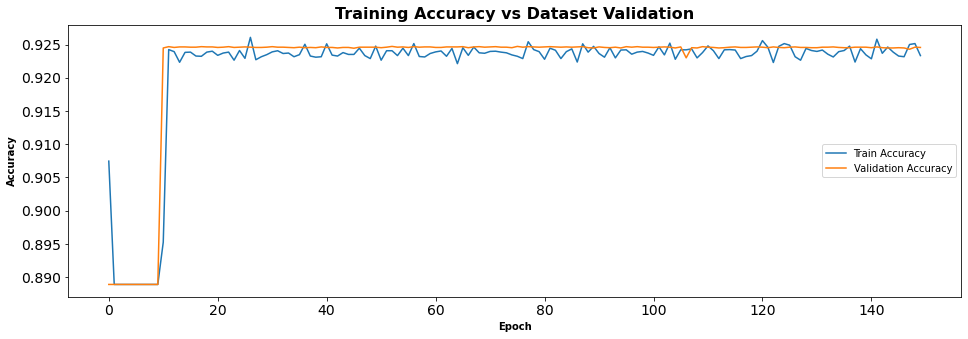

In [104]:
# plot the training/validation accuracy
fig = plt.figure(figsize = [16,5])
plt.title("Training Accuracy vs Dataset Validation", weight="bold")
plt.xlabel("Epoch", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.plot(np.arange(0, epochs), modelHistory2.history["accuracy"], label="Train Accuracy")
plt.plot(np.arange(0, epochs), modelHistory2.history["val_accuracy"], label="Validation Accuracy")
plt.legend(loc="right");
plt.show()

In [105]:
y_predNN2 = model.predict(test_features)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [106]:
y_predNN2.shape

(4443,)

In [107]:
#Getting the accuracy using metrics library
NNAccuracy2 = metrics.accuracy_score(test_labels, y_predNN2)

#getting the classification report for each attack
NNReport2 = metrics.classification_report(test_labels, y_predNN2, sample_weight=None, 
                                         digits=2,output_dict=False)
#printing the results
print(f'Accuracy = {NNAccuracy2}')
print(f' Classification Report =\n {NNReport2}')

Accuracy = 0.6153499887463426
 Classification Report =
               precision    recall  f1-score   support

           2       0.82      0.96      0.88      1481
           3       0.52      0.41      0.46      1121
           4       0.47      0.87      0.61       982
           5       0.00      0.00      0.00       229
           6       0.00      0.00      0.00       380
           7       0.00      0.00      0.00        94
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00        51
          10       0.00      0.00      0.00         5

    accuracy                           0.62      4443
   macro avg       0.20      0.25      0.22      4443
weighted avg       0.51      0.62      0.54      4443



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [108]:
matrix = metrics.confusion_matrix( test_labels, y_predNN2)

In [109]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [110]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig= plt.figure(figsize = [16,16])
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1418   46   17    0    0    0    0    0    0]
 [  57  459  605    0    0    0    0    0    0]
 [  16  109  857    0    0    0    0    0    0]
 [  27   77  125    0    0    0    0    0    0]
 [ 182  159   39    0    0    0    0    0    0]
 [   0    0   94    0    0    0    0    0    0]
 [   1    9   90    0    0    0    0    0    0]
 [  24   19    8    0    0    0    0    0    0]
 [   0    4    1    0    0    0    0    0    0]]


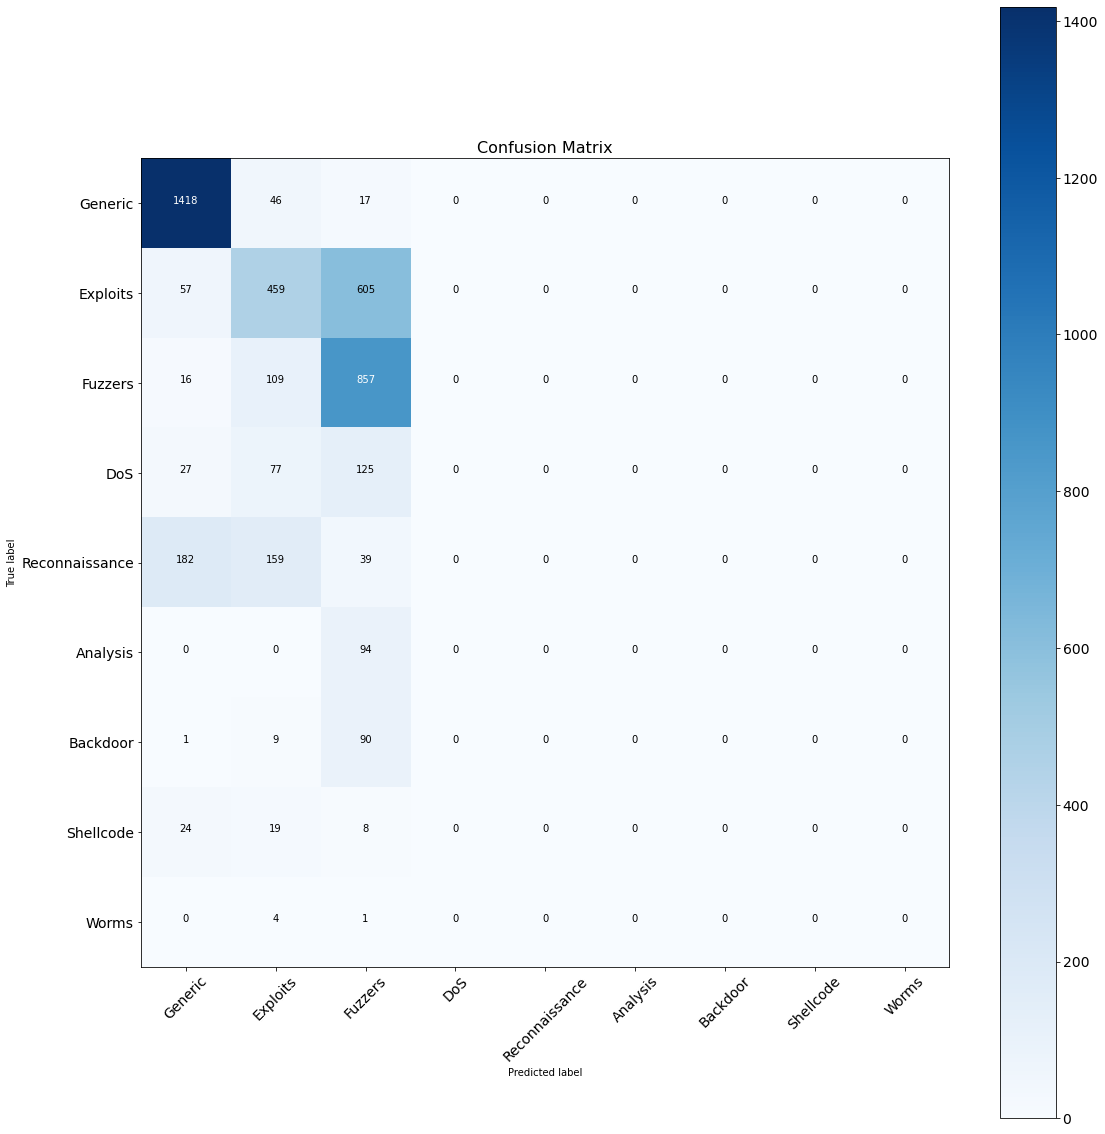

In [111]:
plot_confusion_matrix(cm=matrix, classes=class_labels, title='Confusion Matrix')

# Third Part of the project
## Classification of network attack categories with a reduce small

In [112]:
training_NB15 = pd.read_csv("UNSW-NB15CSV Files/training&testing/UNSW_NB15_training.csv")
testing_NB15 = pd.read_csv("UNSW-NB15CSV Files/training&testing/UNSW_NB15_testing.csv")

In [113]:
# Result when we change null to "normal"
combined_datasets.isnull().sum()

proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
Sload               0
Dload               0
Spkts               0
Dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
trans_depth         0
res_bdy_len         0
Sjit                0
Djit                0
Sintpkt             0
Dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_flw_http_mthd    0
is_ftp_login        0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ ltm         0
ct_src_dport_ltm    0
ct_dst_sport_ltm    0
ct_dst_src_ltm      0
attack_cat          0
Label               0
dtype: int64

In [114]:
training_NB15.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

<ipython-input-114-f88185dfd5e0>:1: FutureWarning:

null_counts is deprecated. Use show_counts instead



In [115]:
#creating the new column names for the new categories on the Train dataset
protocolNames = createLabel('proto',training_NB15)
FlagNames = createLabel('state',training_NB15)
ServiceNames = createLabel('service',training_NB15)
combinationColumn = ServiceNames + FlagNames + protocolNames

In [116]:
# I will hot econder those columns that would be significant to the model by I need a number representation of its string
columns = ['proto','state', 'service' ]
newDF2 = training_NB15[columns]

In [117]:
entoder_df= newDF2.apply(LabelEncoder().fit_transform)

In [118]:
#creating the new df with the new categories added to the train dataset
categorical_df = helperCreationCate(entoder_df, combinationColumn)

In [119]:
#function to check which new catergory is missing on the test dataset
def misserChecker(trainDF, testDF, stringSTR, name):
    #adding the train and test data set to a list to check for the missing columns
    trainning = trainDF[stringSTR].tolist()
    testing = testDF[stringSTR].tolist()
    #finding the values missing on the test dataset
    missingList = list(set(trainning) - set(testing))
    checkCategory = stringSTR+'_'
    #finding the missing columns
    totalColumns=[checkCategory + x for x in missingList]
    print(f'This are the columns that are missing {name} and its data sets are:')
    print(str(totalColumns) + '\n')
    return totalColumns

In [120]:
#checking which columns are missing on the train dataset
finding11= misserChecker(testing_NB15,training_NB15,'proto', 'train')
finding22= misserChecker(testing_NB15,training_NB15, 'state', 'train')
finding33= misserChecker(testing_NB15,training_NB15,'service', 'train')
# finding44= misserChecker(testDF,trainDF,'attack_cat', 'train')

This are the columns that are missing train and its data sets are:
['proto_icmp', 'proto_rtp']

This are the columns that are missing train and its data sets are:
['state_PAR', 'state_no', 'state_ECO', 'state_URN']

This are the columns that are missing train and its data sets are:
[]



In [121]:
#creating the new column names for the new categories on the Train dataset
protocolNames = createLabel('proto',testing_NB15)
FlagNames = createLabel('state',testing_NB15)
ServiceNames = createLabel('service',testing_NB15)
combinationColumn3 = ServiceNames + FlagNames + protocolNames
columns3 = ['proto','state', 'service' ]
newDF3 = testing_NB15[columns3]
entoder_df3= newDF3.apply(LabelEncoder().fit_transform)
#creating the new df with the new categories added to the train dataset
categorical_df3 = helperCreationCate(entoder_df3, combinationColumn3)

In [122]:
#checking which columns are missing on the test dataset
finding1= misserChecker(training_NB15, testing_NB15,'proto', 'test')
finding2= misserChecker(training_NB15, testing_NB15,'state','test')
finding3= misserChecker(training_NB15, testing_NB15,'service', 'test')

This are the columns that are missing test and its data sets are:
[]

This are the columns that are missing test and its data sets are:
['state_ACC', 'state_CLO']

This are the columns that are missing test and its data sets are:
[]



In [123]:
#function to add the missing column to a df
def concactColumns(dataframe, listColumns):
    #loop to add the missing column and put 0 on them
    new_df = dataframe
    for columnName in listColumns:
        new_df[columnName] = 0
    return new_df

In [124]:
#adding the missing columns on the df categorical
trainDFCatFinal = concactColumns(categorical_df, finding11)
trainDFCatFinal = concactColumns(categorical_df, finding22)
trainDFCatFinal = concactColumns(categorical_df, finding33)
testDFCatFinal = concactColumns(categorical_df3, finding1)
testDFCatFinal = concactColumns(categorical_df3, finding2)
testDFCatFinal = concactColumns(categorical_df3, finding3)

<Figure size 432x288 with 0 Axes>

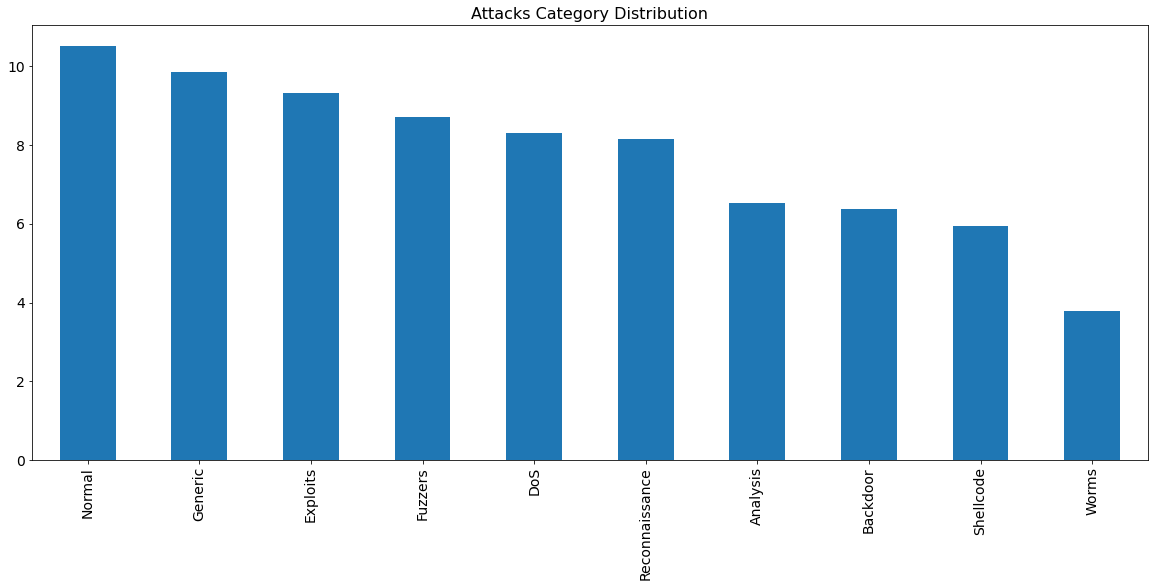

In [125]:
# Distribution grap of the sub-category of attack according to data provided for this project
plt.clf()
plt.figure(figsize=(20,8))
params = {'axes.titlesize':'16','xtick.labelsize':'14','ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
plt.title('Attacks Category Distribution')
training_NB15['attack_cat'].value_counts().apply(np.log).plot(kind='bar')
plt.show()

In [126]:
DFFinal_T = optimizeDF(training_NB15, trainDFCatFinal)
DFFinal_Test = optimizeDF(testing_NB15, testDFCatFinal)

(82332, 199)
(175341, 199)


In [127]:
DFFinal_T['attack_cat']= DFFinal_T['attack_cat'].apply(LabelCode)
DFFinal_Test['attack_cat']= DFFinal_Test['attack_cat'].apply(LabelCode)
print(DFFinal_T['attack_cat'].unique())
print(DFFinal_Test['attack_cat'].unique())


[ 1  6  8  5  3  7  4 10  9  2]
[ 1  8  7  4  9  6  3  5 10  2]


In [128]:
print(DFFinal_T.shape)
print(DFFinal_Test.shape)

(82332, 199)
(175341, 199)


In [129]:
DFFinal_T['attack_cat'].value_counts()

1     37000
2     18871
3     11132
4      6062
5      4089
6      3496
7       677
8       583
9       378
10       44
Name: attack_cat, dtype: int64

In [130]:
# Use a utility from sklearn to split and shuffle our dataset.
#train_df, test_df = train_test_split(DFFinal_T, test_size=0.2)
train_df, val_df = train_test_split(DFFinal_T, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(DFFinal_T.pop('attack_cat'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('attack_cat'))
test_labels = np.array(DFFinal_Test.pop('attack_cat'))

train_features = np.array(DFFinal_T)
val_features = np.array(val_df)
test_features = np.array(DFFinal_Test)

In [131]:
print(val_features.shape)
print(test_features.shape)
print(train_features.shape)

(16467, 198)
(175341, 198)
(82332, 198)


In [132]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (82332,)
Validation labels shape: (16467,)
Test labels shape: (175341,)
Training features shape: (82332, 198)
Validation features shape: (16467, 198)
Test features shape: (175341, 198)


In [133]:
#Function to create our Neural Network Model with 6 Hidden layers
def createModel():
    model = Sequential()
    #output dimension in my case would be 217 thanks for the shape of the trainX
    model.add(Dense(198,input_dim =198,activation = 'relu',kernel_initializer='random_uniform'))
    model.add(Dense(175,activation = 'relu',kernel_initializer='random_uniform'))
    model.add(Dense(150,activation = 'relu',kernel_initializer='random_uniform'))
    model.add(Dense(100,activation = 'relu',kernel_initializer='random_uniform'))
    model.add(Dense(50,activation = 'relu',kernel_initializer='random_uniform'))
    model.add(Dense(25,activation = 'relu',kernel_initializer='random_uniform'))
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    # This would refers to the number of attack labels
    model.add(Dense(10,activation='softmax'))
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = metrics1)
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, verbose=1, mode='auto')

    return model

In [134]:
#variables for both models epochs and batchsize
epochs = 200
batch_size = 25
model2 = KerasClassifier(build_fn=createModel,epochs=epochs,batch_size=batch_size,steps_per_epoch =500)

In [135]:
modelHistory2 = model2.fit(train_features, train_labels, validation_data=(val_features, val_labels),verbose=1, validation_split=0.4)

Epoch 1/200
500/500 [==============================] - 8s 16ms/step - loss: 2.1202 - tp: 920.0000 - fp: 7.0000 - tn: 135245.0000 - fn: 14424.0000 - accuracy: 0.9046 - precision: 0.9924 - recall: 0.0600 - auc: 0.8143 - prc: 0.3790 - val_loss: 1.9413 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 296397.0000 - val_fn: 32933.0000 - val_accuracy: 0.9000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8673 - val_prc: 0.4192
Epoch 2/200
500/500 [==============================] - 6s 12ms/step - loss: 1.7784 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 112500.0000 - fn: 12500.0000 - accuracy: 0.9000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.8820 - prc: 0.4282 - val_loss: 1.6633 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 296397.0000 - val_fn: 32933.0000 - val_accuracy: 0.9000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8926 - val_prc: 0.4907
Epoch 3/200
500/500 [==============================] - 6s 12ms/step - loss: 1.5057 - tp: 0.000

500/500 [==============================] - 7s 13ms/step - loss: 0.8300 - tp: 5140.0000 - fp: 0.0000e+00 - tn: 112500.0000 - fn: 7360.0000 - accuracy: 0.9411 - precision: 1.0000 - recall: 0.4112 - auc: 0.9627 - prc: 0.8595 - val_loss: 0.8077 - val_tp: 16480.0000 - val_fp: 0.0000e+00 - val_tn: 296397.0000 - val_fn: 16453.0000 - val_accuracy: 0.9500 - val_precision: 1.0000 - val_recall: 0.5004 - val_auc: 0.9611 - val_prc: 0.8675
Epoch 20/200
500/500 [==============================] - 7s 13ms/step - loss: 0.7953 - tp: 7770.0000 - fp: 2.0000 - tn: 112489.0000 - fn: 4729.0000 - accuracy: 0.9621 - precision: 0.9997 - recall: 0.6216 - auc: 0.9656 - prc: 0.8672 - val_loss: 0.7910 - val_tp: 23221.0000 - val_fp: 23.0000 - val_tn: 296374.0000 - val_fn: 9712.0000 - val_accuracy: 0.9704 - val_precision: 0.9990 - val_recall: 0.7051 - val_auc: 0.9635 - val_prc: 0.8710
Epoch 21/200
500/500 [==============================] - 7s 13ms/step - loss: 0.7880 - tp: 8010.0000 - fp: 1.0000 - tn: 112499.0000 - fn

Epoch 38/200
500/500 [==============================] - 6s 12ms/step - loss: 0.6494 - tp: 8186.0000 - fp: 57.0000 - tn: 112443.0000 - fn: 4314.0000 - accuracy: 0.9650 - precision: 0.9931 - recall: 0.6549 - auc: 0.9790 - prc: 0.8978 - val_loss: 0.6496 - val_tp: 23139.0000 - val_fp: 90.0000 - val_tn: 296307.0000 - val_fn: 9794.0000 - val_accuracy: 0.9700 - val_precision: 0.9961 - val_recall: 0.7026 - val_auc: 0.9753 - val_prc: 0.8981
Epoch 39/200
500/500 [==============================] - 7s 13ms/step - loss: 0.6377 - tp: 8119.0000 - fp: 1.0000 - tn: 112499.0000 - fn: 4381.0000 - accuracy: 0.9649 - precision: 0.9999 - recall: 0.6495 - auc: 0.9797 - prc: 0.9001 - val_loss: 0.6461 - val_tp: 23143.0000 - val_fp: 102.0000 - val_tn: 296295.0000 - val_fn: 9790.0000 - val_accuracy: 0.9700 - val_precision: 0.9956 - val_recall: 0.7027 - val_auc: 0.9752 - val_prc: 0.8980
Epoch 40/200
500/500 [==============================] - 7s 13ms/step - loss: 0.6377 - tp: 7999.0000 - fp: 5.0000 - tn: 112486.00

Epoch 57/200
500/500 [==============================] - 6s 13ms/step - loss: 0.5732 - tp: 8060.0000 - fp: 2.0000 - tn: 112498.0000 - fn: 4440.0000 - accuracy: 0.9645 - precision: 0.9998 - recall: 0.6448 - auc: 0.9806 - prc: 0.9005 - val_loss: 0.5886 - val_tp: 23221.0000 - val_fp: 50.0000 - val_tn: 296347.0000 - val_fn: 9712.0000 - val_accuracy: 0.9704 - val_precision: 0.9979 - val_recall: 0.7051 - val_auc: 0.9767 - val_prc: 0.9005
Epoch 58/200
500/500 [==============================] - 6s 12ms/step - loss: 0.5715 - tp: 8109.0000 - fp: 4.0000 - tn: 112496.0000 - fn: 4391.0000 - accuracy: 0.9648 - precision: 0.9995 - recall: 0.6487 - auc: 0.9805 - prc: 0.9006 - val_loss: 0.5811 - val_tp: 23221.0000 - val_fp: 4.0000 - val_tn: 296393.0000 - val_fn: 9712.0000 - val_accuracy: 0.9705 - val_precision: 0.9998 - val_recall: 0.7051 - val_auc: 0.9771 - val_prc: 0.9013
Epoch 59/200
500/500 [==============================] - 6s 13ms/step - loss: 0.5737 - tp: 8077.0000 - fp: 8.0000 - tn: 112492.0000 

Epoch 76/200
500/500 [==============================] - 6s 12ms/step - loss: 0.5300 - tp: 8187.0000 - fp: 3.0000 - tn: 112488.0000 - fn: 4312.0000 - accuracy: 0.9655 - precision: 0.9996 - recall: 0.6550 - auc: 0.9830 - prc: 0.9072 - val_loss: 0.5601 - val_tp: 23225.0000 - val_fp: 4.0000 - val_tn: 296393.0000 - val_fn: 9708.0000 - val_accuracy: 0.9705 - val_precision: 0.9998 - val_recall: 0.7052 - val_auc: 0.9800 - val_prc: 0.9036
Epoch 77/200
500/500 [==============================] - 6s 13ms/step - loss: 0.5508 - tp: 8039.0000 - fp: 2.0000 - tn: 112498.0000 - fn: 4461.0000 - accuracy: 0.9643 - precision: 0.9998 - recall: 0.6431 - auc: 0.9813 - prc: 0.8990 - val_loss: 0.5561 - val_tp: 23221.0000 - val_fp: 4.0000 - val_tn: 296393.0000 - val_fn: 9712.0000 - val_accuracy: 0.9705 - val_precision: 0.9998 - val_recall: 0.7051 - val_auc: 0.9800 - val_prc: 0.9036
Epoch 78/200
500/500 [==============================] - 6s 13ms/step - loss: 0.5580 - tp: 8029.0000 - fp: 3.0000 - tn: 112497.0000 -

Epoch 95/200
500/500 [==============================] - 6s 12ms/step - loss: 0.5359 - tp: 8084.0000 - fp: 3.0000 - tn: 112488.0000 - fn: 4415.0000 - accuracy: 0.9647 - precision: 0.9996 - recall: 0.6468 - auc: 0.9825 - prc: 0.9027 - val_loss: 0.5489 - val_tp: 23224.0000 - val_fp: 9.0000 - val_tn: 296388.0000 - val_fn: 9709.0000 - val_accuracy: 0.9705 - val_precision: 0.9996 - val_recall: 0.7052 - val_auc: 0.9815 - val_prc: 0.9049
Epoch 96/200
500/500 [==============================] - 6s 12ms/step - loss: 0.5403 - tp: 8061.0000 - fp: 2.0000 - tn: 112498.0000 - fn: 4439.0000 - accuracy: 0.9645 - precision: 0.9998 - recall: 0.6449 - auc: 0.9822 - prc: 0.9007 - val_loss: 0.5473 - val_tp: 23220.0000 - val_fp: 5.0000 - val_tn: 296392.0000 - val_fn: 9713.0000 - val_accuracy: 0.9705 - val_precision: 0.9998 - val_recall: 0.7051 - val_auc: 0.9816 - val_prc: 0.9049
Epoch 97/200
500/500 [==============================] - 6s 12ms/step - loss: 0.5357 - tp: 8083.0000 - fp: 4.0000 - tn: 112496.0000 -

Epoch 114/200
500/500 [==============================] - 6s 13ms/step - loss: 0.5401 - tp: 8035.0000 - fp: 1.0000 - tn: 112499.0000 - fn: 4465.0000 - accuracy: 0.9643 - precision: 0.9999 - recall: 0.6428 - auc: 0.9821 - prc: 0.9001 - val_loss: 0.5497 - val_tp: 23128.0000 - val_fp: 7.0000 - val_tn: 296390.0000 - val_fn: 9805.0000 - val_accuracy: 0.9702 - val_precision: 0.9997 - val_recall: 0.7023 - val_auc: 0.9816 - val_prc: 0.9041
Epoch 115/200
500/500 [==============================] - 6s 13ms/step - loss: 0.5436 - tp: 8046.0000 - fp: 7.0000 - tn: 112484.0000 - fn: 4453.0000 - accuracy: 0.9643 - precision: 0.9991 - recall: 0.6437 - auc: 0.9823 - prc: 0.9031 - val_loss: 0.5426 - val_tp: 23212.0000 - val_fp: 3.0000 - val_tn: 296394.0000 - val_fn: 9721.0000 - val_accuracy: 0.9705 - val_precision: 0.9999 - val_recall: 0.7048 - val_auc: 0.9821 - val_prc: 0.9065
Epoch 116/200
500/500 [==============================] - 6s 13ms/step - loss: 0.5288 - tp: 8101.0000 - fp: 1.0000 - tn: 112499.000

Epoch 133/200
500/500 [==============================] - 6s 13ms/step - loss: 0.5274 - tp: 8092.0000 - fp: 12.0000 - tn: 112488.0000 - fn: 4408.0000 - accuracy: 0.9646 - precision: 0.9985 - recall: 0.6474 - auc: 0.9841 - prc: 0.9120 - val_loss: 0.5403 - val_tp: 23241.0000 - val_fp: 55.0000 - val_tn: 296342.0000 - val_fn: 9692.0000 - val_accuracy: 0.9704 - val_precision: 0.9976 - val_recall: 0.7057 - val_auc: 0.9821 - val_prc: 0.9087
Epoch 134/200
500/500 [==============================] - 6s 13ms/step - loss: 0.5210 - tp: 8093.0000 - fp: 6.0000 - tn: 112494.0000 - fn: 4407.0000 - accuracy: 0.9647 - precision: 0.9993 - recall: 0.6474 - auc: 0.9844 - prc: 0.9124 - val_loss: 0.5360 - val_tp: 23245.0000 - val_fp: 82.0000 - val_tn: 296315.0000 - val_fn: 9688.0000 - val_accuracy: 0.9703 - val_precision: 0.9965 - val_recall: 0.7058 - val_auc: 0.9825 - val_prc: 0.9105
Epoch 135/200
500/500 [==============================] - 6s 13ms/step - loss: 0.5212 - tp: 8107.0000 - fp: 5.0000 - tn: 112486.

Epoch 152/200
500/500 [==============================] - 7s 13ms/step - loss: 0.5134 - tp: 9513.0000 - fp: 982.0000 - tn: 111518.0000 - fn: 2987.0000 - accuracy: 0.9682 - precision: 0.9064 - recall: 0.7610 - auc: 0.9854 - prc: 0.9180 - val_loss: 0.5297 - val_tp: 23763.0000 - val_fp: 161.0000 - val_tn: 296236.0000 - val_fn: 9170.0000 - val_accuracy: 0.9717 - val_precision: 0.9933 - val_recall: 0.7216 - val_auc: 0.9831 - val_prc: 0.9144
Epoch 153/200
500/500 [==============================] - 6s 13ms/step - loss: 0.4981 - tp: 9480.0000 - fp: 795.0000 - tn: 111705.0000 - fn: 3020.0000 - accuracy: 0.9695 - precision: 0.9226 - recall: 0.7584 - auc: 0.9861 - prc: 0.9216 - val_loss: 0.5296 - val_tp: 23805.0000 - val_fp: 261.0000 - val_tn: 296136.0000 - val_fn: 9128.0000 - val_accuracy: 0.9715 - val_precision: 0.9892 - val_recall: 0.7228 - val_auc: 0.9836 - val_prc: 0.9159
Epoch 154/200
500/500 [==============================] - 6s 13ms/step - loss: 0.5005 - tp: 9659.0000 - fp: 946.0000 - tn: 

500/500 [==============================] - 6s 13ms/step - loss: 0.4772 - tp: 9632.0000 - fp: 901.0000 - tn: 111590.0000 - fn: 2867.0000 - accuracy: 0.9699 - precision: 0.9145 - recall: 0.7706 - auc: 0.9870 - prc: 0.9269 - val_loss: 0.5114 - val_tp: 23764.0000 - val_fp: 73.0000 - val_tn: 296324.0000 - val_fn: 9169.0000 - val_accuracy: 0.9719 - val_precision: 0.9969 - val_recall: 0.7216 - val_auc: 0.9855 - val_prc: 0.9251
Epoch 171/200
500/500 [==============================] - 6s 13ms/step - loss: 0.4944 - tp: 9581.0000 - fp: 965.0000 - tn: 111535.0000 - fn: 2919.0000 - accuracy: 0.9689 - precision: 0.9085 - recall: 0.7665 - auc: 0.9863 - prc: 0.9227 - val_loss: 0.5101 - val_tp: 24531.0000 - val_fp: 322.0000 - val_tn: 296075.0000 - val_fn: 8402.0000 - val_accuracy: 0.9735 - val_precision: 0.9870 - val_recall: 0.7449 - val_auc: 0.9852 - val_prc: 0.9276
Epoch 172/200
500/500 [==============================] - 6s 13ms/step - loss: 0.4714 - tp: 9743.0000 - fp: 988.0000 - tn: 111512.0000 - f

500/500 [==============================] - 7s 13ms/step - loss: 0.4671 - tp: 9686.0000 - fp: 984.0000 - tn: 111516.0000 - fn: 2814.0000 - accuracy: 0.9696 - precision: 0.9078 - recall: 0.7749 - auc: 0.9877 - prc: 0.9324 - val_loss: 0.5054 - val_tp: 24561.0000 - val_fp: 421.0000 - val_tn: 295976.0000 - val_fn: 8372.0000 - val_accuracy: 0.9733 - val_precision: 0.9831 - val_recall: 0.7458 - val_auc: 0.9855 - val_prc: 0.9326
Epoch 189/200
500/500 [==============================] - 7s 13ms/step - loss: 0.4633 - tp: 9738.0000 - fp: 1001.0000 - tn: 111499.0000 - fn: 2762.0000 - accuracy: 0.9699 - precision: 0.9068 - recall: 0.7790 - auc: 0.9878 - prc: 0.9332 - val_loss: 0.5008 - val_tp: 24867.0000 - val_fp: 421.0000 - val_tn: 295976.0000 - val_fn: 8066.0000 - val_accuracy: 0.9742 - val_precision: 0.9834 - val_recall: 0.7551 - val_auc: 0.9854 - val_prc: 0.9344
Epoch 190/200
500/500 [==============================] - 7s 13ms/step - loss: 0.4643 - tp: 9725.0000 - fp: 979.0000 - tn: 111512.0000 -

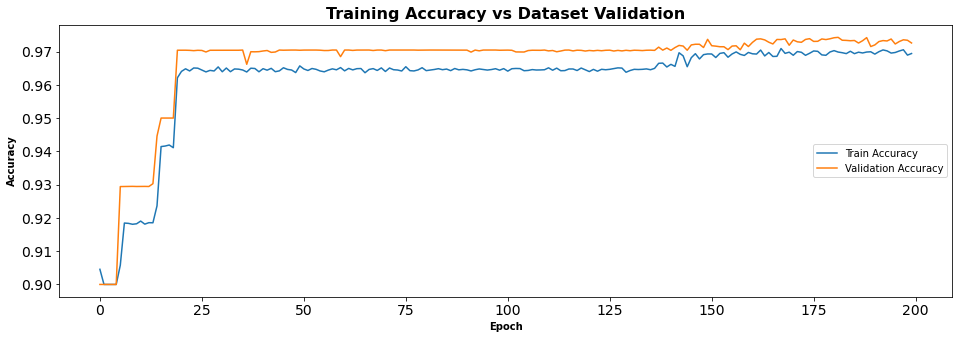

In [136]:
# plot the training/validation accuracy
fig = plt.figure(figsize = [16,5])
plt.title("Training Accuracy vs Dataset Validation", weight="bold")
plt.xlabel("Epoch", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.plot(np.arange(0, epochs), modelHistory2.history["accuracy"], label="Train Accuracy")
plt.plot(np.arange(0, epochs), modelHistory2.history["val_accuracy"], label="Validation Accuracy")
plt.legend(loc="right");
plt.show()

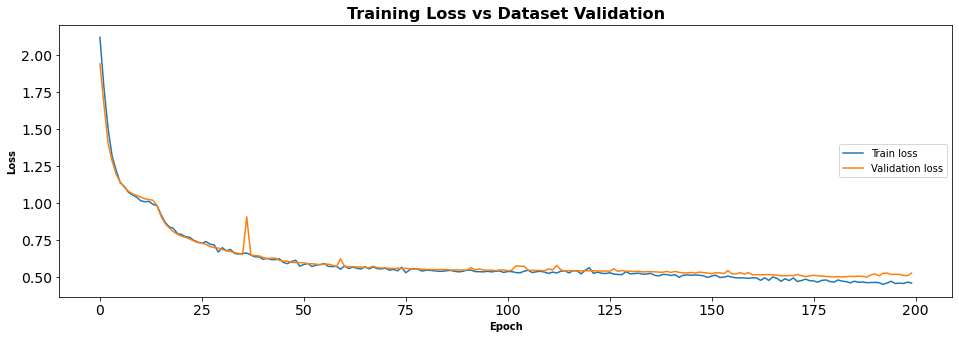

In [137]:
# plot the training/validation loss
fig= plt.figure(figsize = [16,5])
plt.title("Training Loss vs Dataset Validation", weight="bold")
plt.xlabel("Epoch", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.plot(np.arange(0, epochs), modelHistory2.history["loss"], label="Train loss")
plt.plot(np.arange(0, epochs), modelHistory2.history["val_loss"], label="Validation loss")
plt.legend(loc="right");
plt.show()

In [138]:
y_predNN2 = model2.predict(test_features)

In [139]:
#Getting the accuracy using metrics library
NNAccuracy2 = metrics.accuracy_score(test_labels, y_predNN2)

#getting the classification report for each attack
NNReport2 = metrics.classification_report(test_labels, y_predNN2, sample_weight=None, 
                                         digits=2,output_dict=False)
#printing the results
print(f'Accuracy = {NNAccuracy2}')
print(f' Classification Report =\n {NNReport2}')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy = 0.41965655494151394
 Classification Report =
               precision    recall  f1-score   support

           1       1.00      0.78      0.88     56000
           2       0.03      0.00      0.00     40000
           3       0.34      0.84      0.48     33393
           4       0.04      0.10      0.05     18184
           5       0.00      0.00      0.00     12264
           6       0.00      0.00      0.00     10491
           7       0.00      0.00      0.00      2000
           8       0.00      0.00      0.00      1746
           9       0.00      0.00      0.00      1133
          10       0.00      0.00      0.00       130

    accuracy                           0.42    175341
   macro avg       0.14      0.17      0.14    175341
weighted avg       0.39      0.42      0.38    175341



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [140]:
matrix = metrics.confusion_matrix(test_labels, y_predNN2)

Confusion matrix, without normalization
[[43656   752 11243   349     0     0     0     0     0     0]
 [    0    24  1763 38213     0     0     0     0     0     0]
 [    0    91 28110  5192     0     0     0     0     0     0]
 [    0     1 16390  1793     0     0     0     0     0     0]
 [    0    19 11541   704     0     0     0     0     0     0]
 [    0    17  9441  1033     0     0     0     0     0     0]
 [    0     0  1950    50     0     0     0     0     0     0]
 [    0     7  1686    53     0     0     0     0     0     0]
 [    0     0  1130     3     0     0     0     0     0     0]
 [    0     8    55    67     0     0     0     0     0     0]]


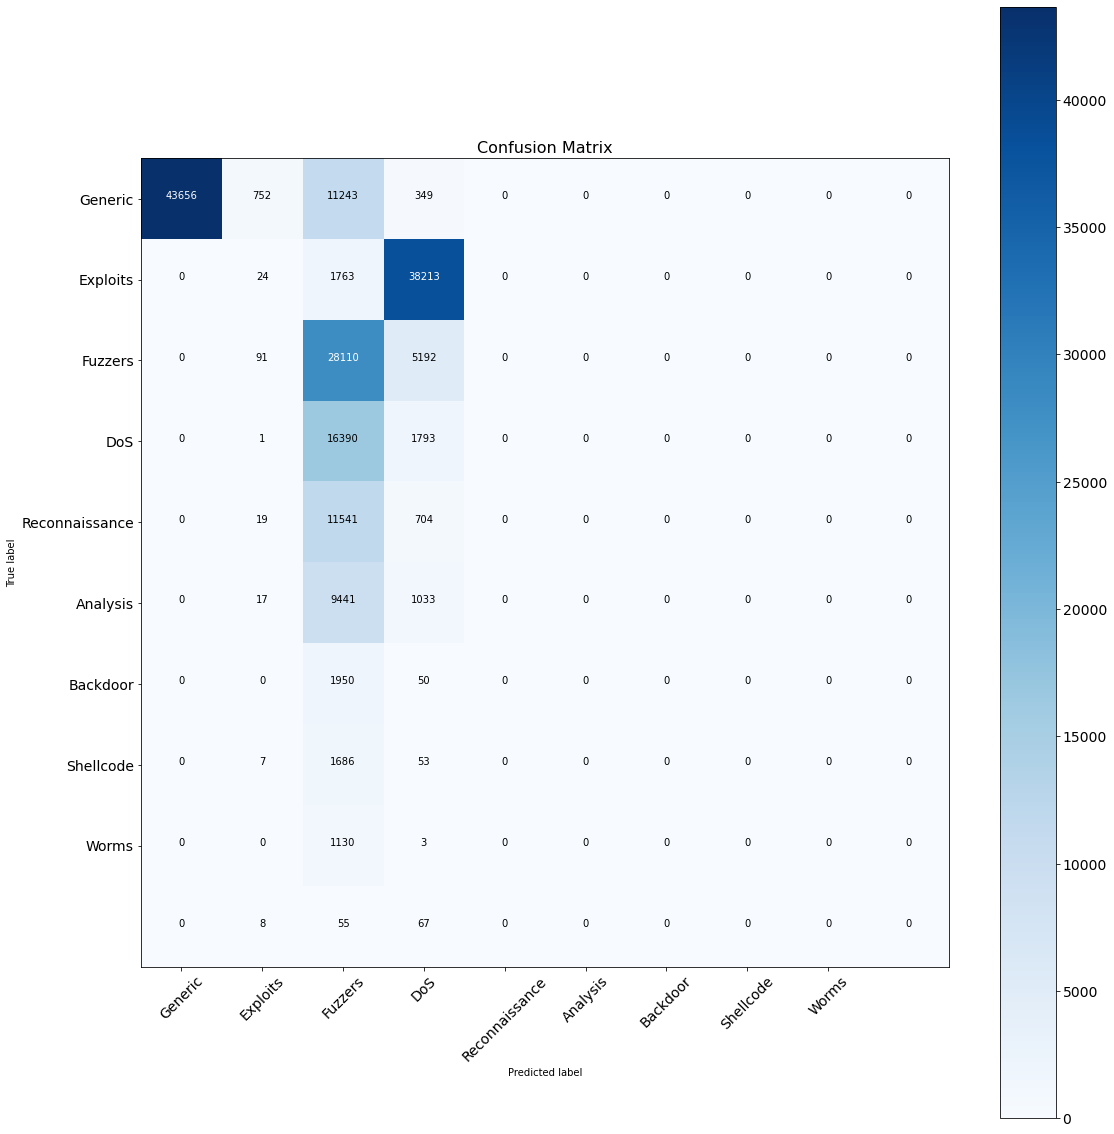

In [141]:
plot_confusion_matrix(cm=matrix, classes=class_labels, title='Confusion Matrix')

In [143]:
combined_datasets['Label'].value_counts()

0    1064988
1      22215
Name: Label, dtype: int64